In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/Users/sol/Google Drive/professional/research/utilities/python_myfun')
import cartopy.crs as ctp
import math
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [317]:
tmp=pd.read_csv('../data/zoo_selgroups_depth_relabundance.csv', index_col=0)
nombres=tmp.iloc[0]
tmp=tmp.drop(tmp.index[0])
lat=tmp.lat.astype(float)
tmp['lat']=lat
lon=tmp.long.astype(float)
tmp['long']=lon
yr=tmp.year.astype(int)
tmp['year']=yr
dep=tmp.depth.astype(float)
yrs=np.arange(yr.min(),yr.max()+1)
# tranform all gorups abundance as float as wwell
for i in list(tmp)[11:]:
    ok=tmp[i].astype(float)
    tmp[i]=ok

In [87]:
dt=pd.read_csv('../data/zoo_binsaverages_selgroups_abundance_5mar2019.csv',index_col=0)
sgr=list()
for i in list(dt)[4:]:
    tmp1=dt[i].copy()
    tmp2=tmp1[tmp1>0]
    if len(tmp2)>=6:
        sgr.append(i)
coor=pd.DataFrame(data=dt.lat.values,columns=['lat'])
coor['lon']=dt.lon.values

In [281]:
bingrpyrs=np.full((len(coor),len(sgr),len(yrs)),np.nan)
bingrpyrs_n=np.full((len(coor),len(sgr),len(yrs)),np.nan)
binsamp=np.full((len(coor),len(yrs)),np.nan)

In [294]:
for yi,y in enumerate(yrs):
    for b in range(len(coor)):
        a=tmp[(tmp['lat']>=coor['lat'][b]-1)&(tmp['lat']<coor['lat'][b]+1)&(tmp['long']>=coor['lon'][b]-1+0.2)&(tmp['long']<coor['lon'][b]+1+0.2)&(tmp['year']==y)]
        ni,mi=a.shape
        print(y,b)
        if ni>0:
            for gi,group in enumerate(sgr):
                numg=nombres.loc[nombres==group].index.values[0] # column name/number id
                #print(group, a[numg])
                bingrpyrs[b,gi,yi]=np.mean(a[numg].values) # bin, groups, years
            binsamp[b,yi]=ni
# normalize to compare to clustering normalization (over all years mean/std)
for gi, group in enumerate(sgr):
    mt=np.nanmean(bingrpyrs[:,gi,:],axis=1)
    m=np.nanmean(mt)
    s=np.nanstd(mt)
    print(m,s)
    bingrpyrs_n[:,gi,:]=(bingrpyrs[:,gi,:]-m)/s



2000 0
2000 1
2000 2
2000 3
2000 4
2000 5
2000 6
2000 7
2000 8
2000 9
2000 10
2000 11
2000 12
2000 13
2000 14
2000 15
2000 16
2000 17
2000 18
2000 19
2000 20
2000 21
2000 22
2000 23
2000 24
2000 25
2000 26
2000 27
2000 28
2000 29
2000 30
2000 31
2000 32
2000 33
2000 34
2000 35
2000 36
2000 37
2000 38
2000 39
2000 40
2001 0
2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2001 13
2001 14
2001 15
2001 16
2001 17
2001 18
2001 19
2001 20
2001 21
2001 22
2001 23
2001 24
2001 25
2001 26
2001 27
2001 28
2001 29
2001 30
2001 31
2001 32
2001 33
2001 34
2001 35
2001 36
2001 37
2001 38
2001 39
2001 40
2002 0
2002 1
2002 2
2002 3
2002 4
2002 5
2002 6
2002 7
2002 8
2002 9
2002 10
2002 11
2002 12
2002 13
2002 14
2002 15
2002 16
2002 17
2002 18
2002 19
2002 20
2002 21
2002 22
2002 23
2002 24
2002 25
2002 26
2002 27
2002 28
2002 29
2002 30
2002 31
2002 32
2002 33
2002 34
2002 35
2002 36
2002 37
2002 38
2002 39
2002 40
2003 0
2003 1
2003 2
2003 3
2003 4
2003 5
2003

In [206]:
binyrs=bingrpyrs.mean(axis=1)*0+5


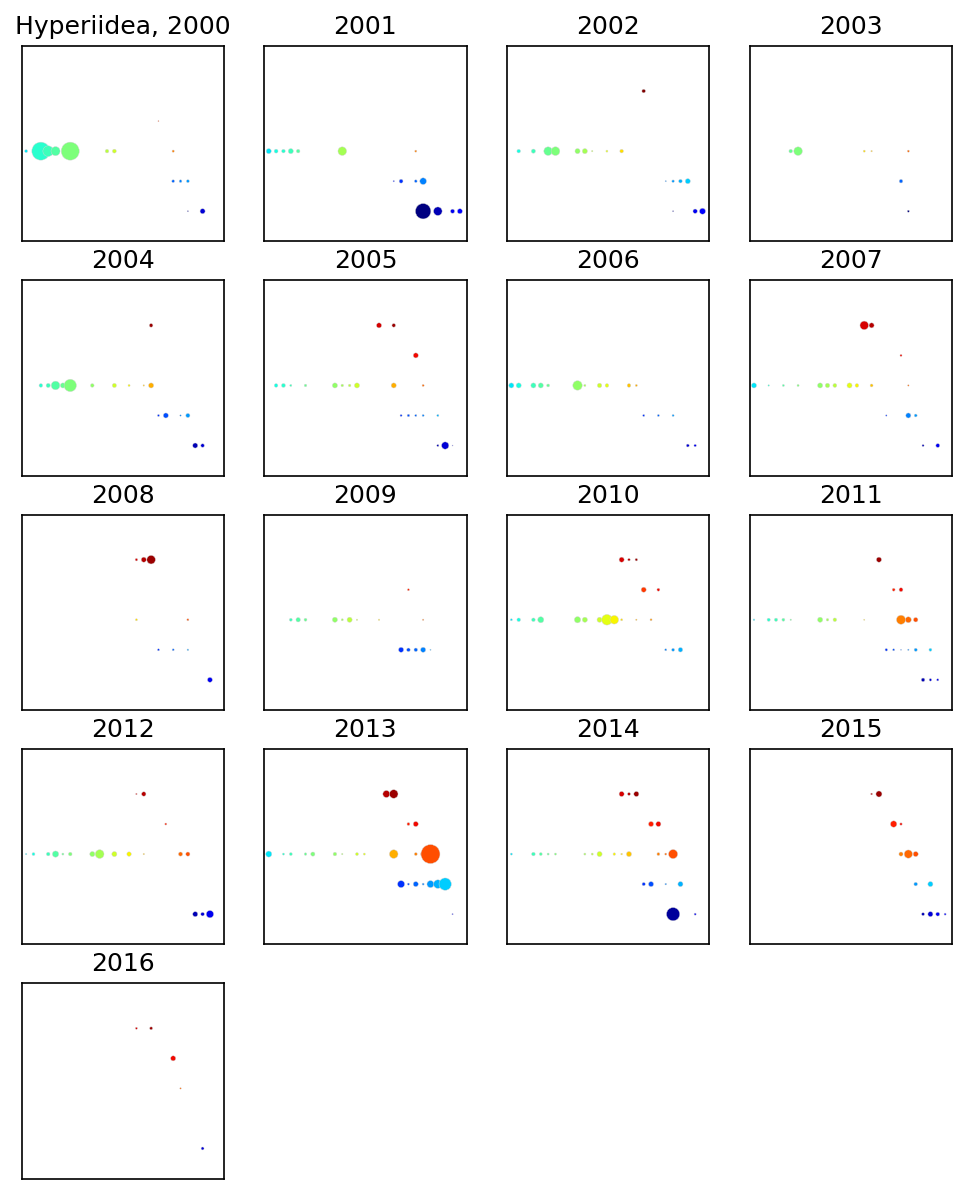

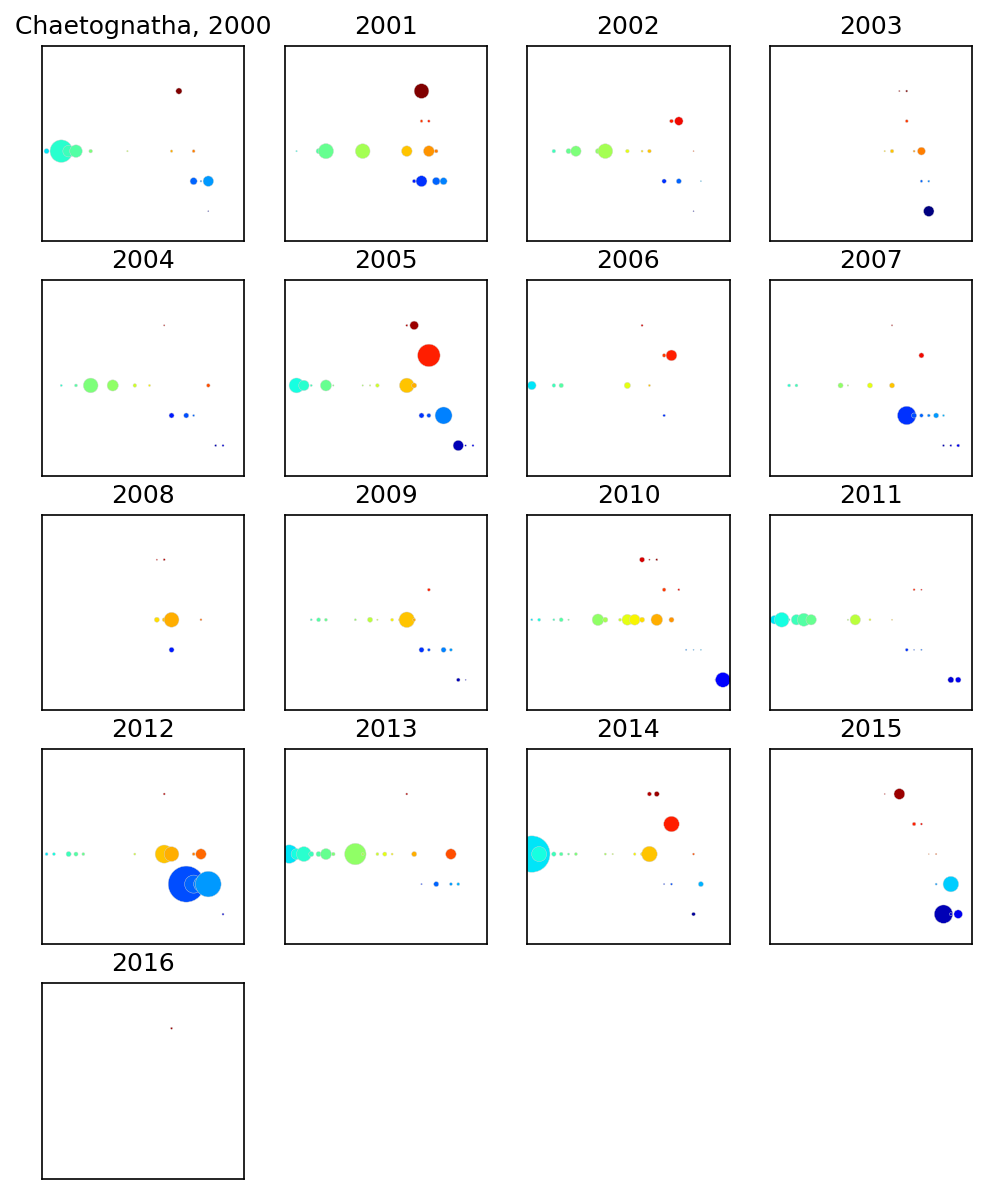

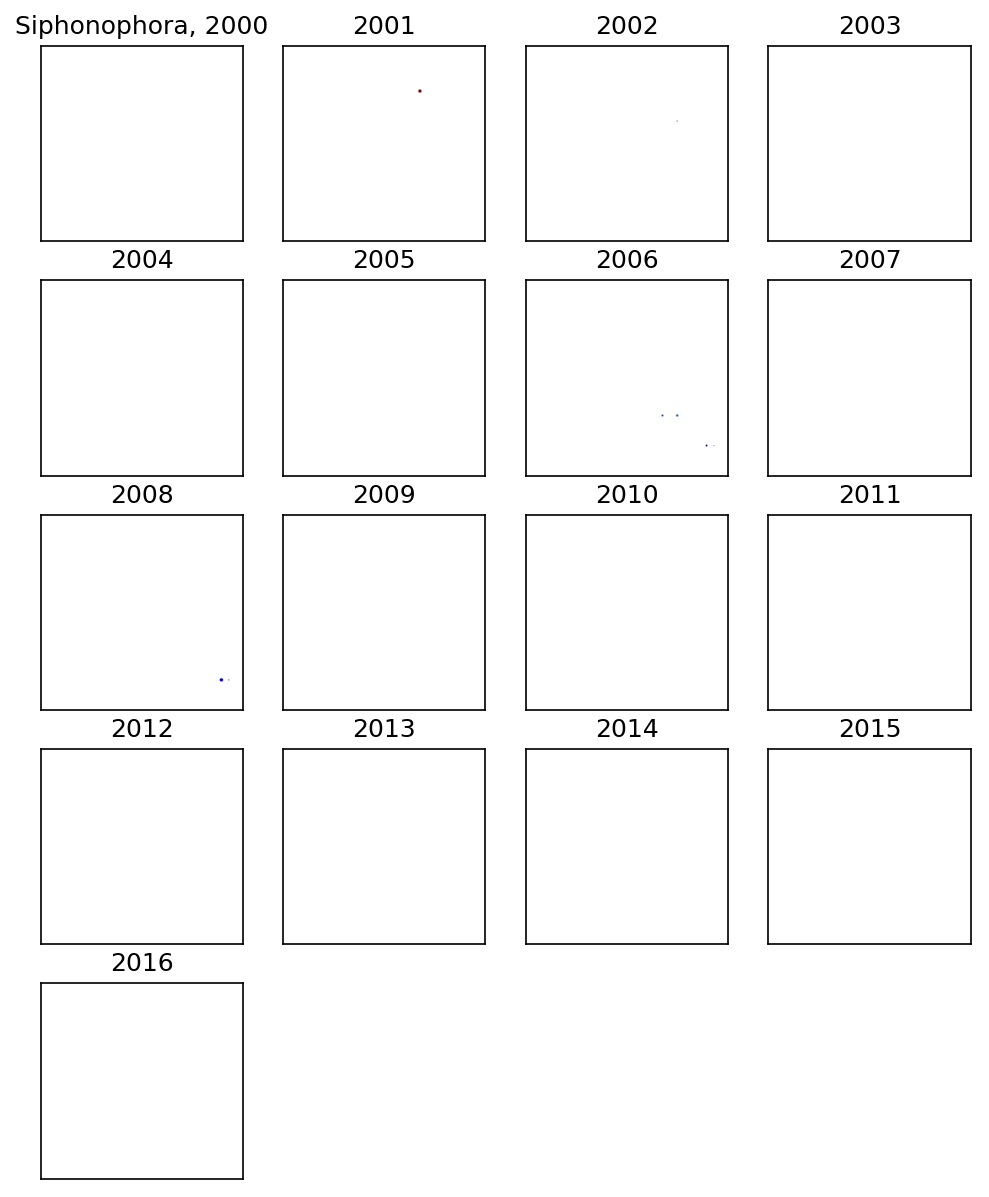

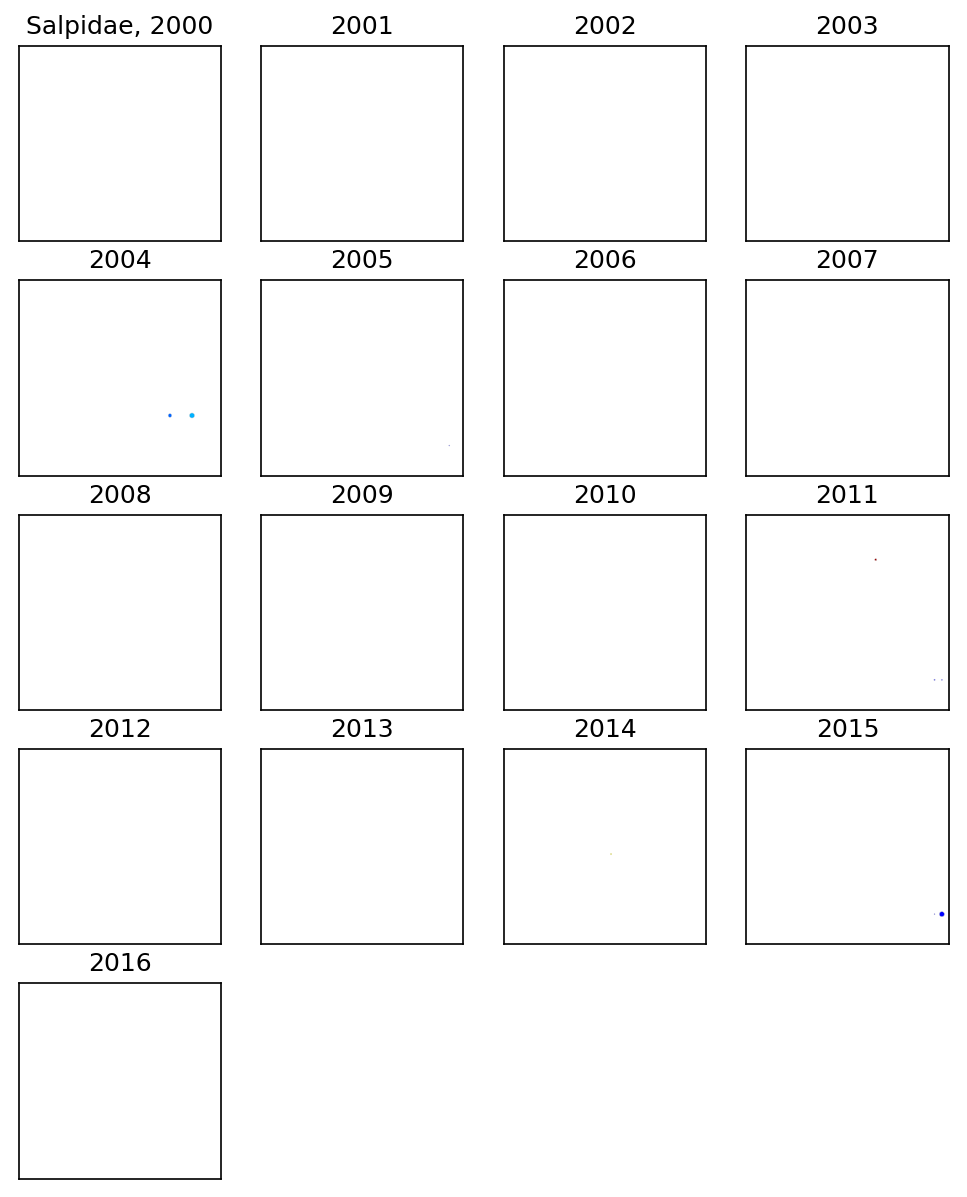

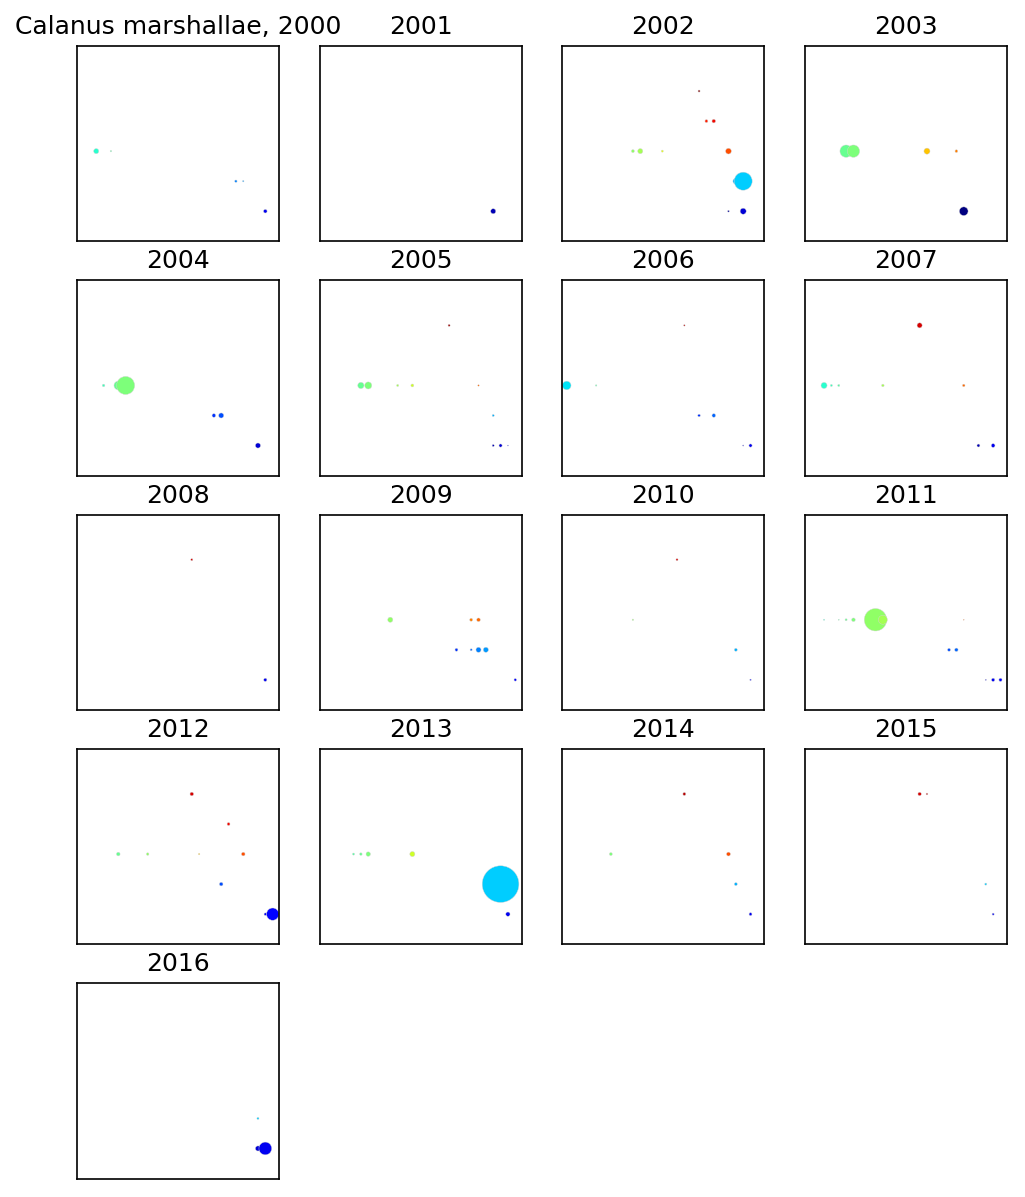

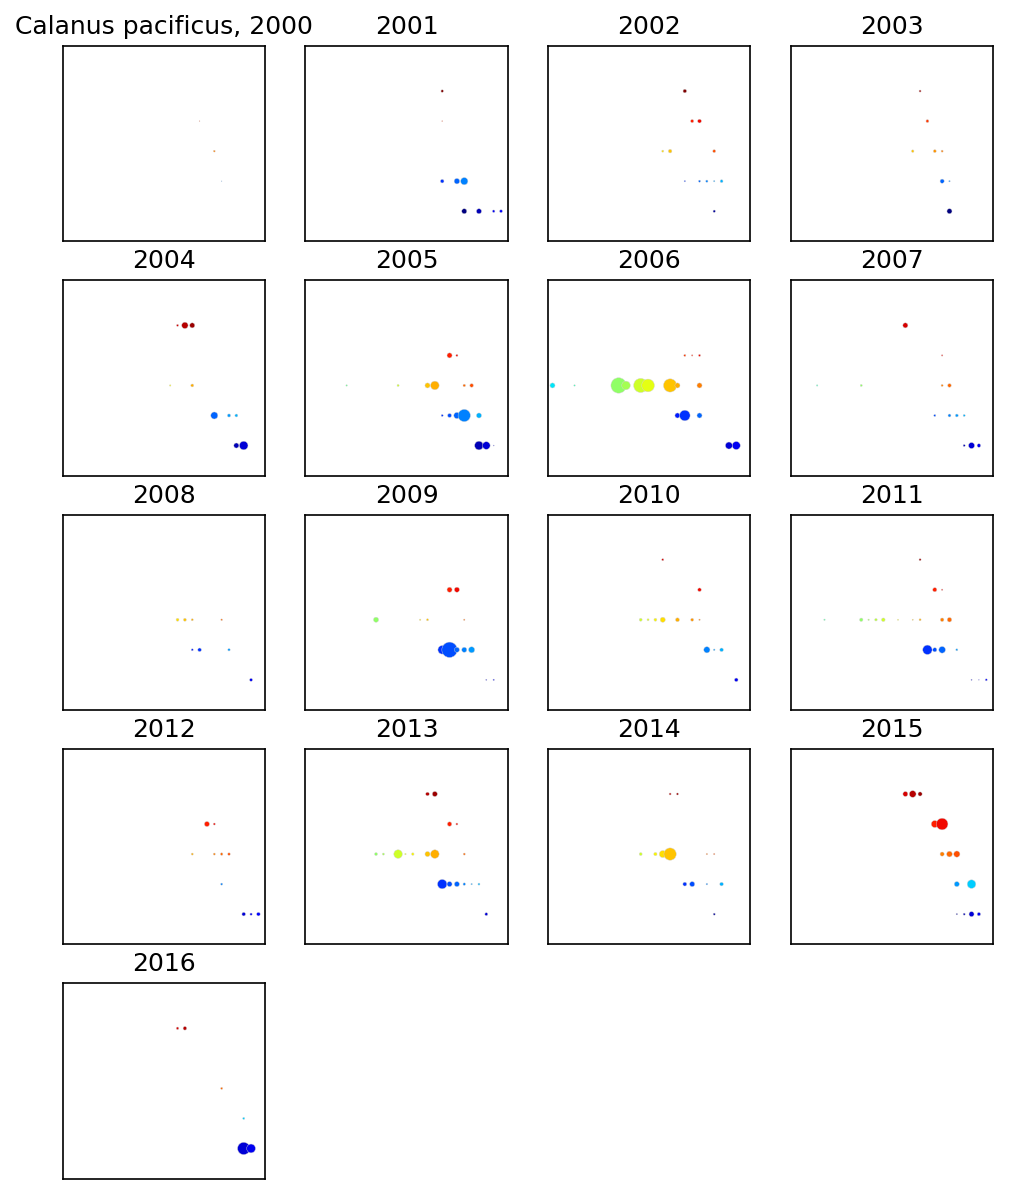

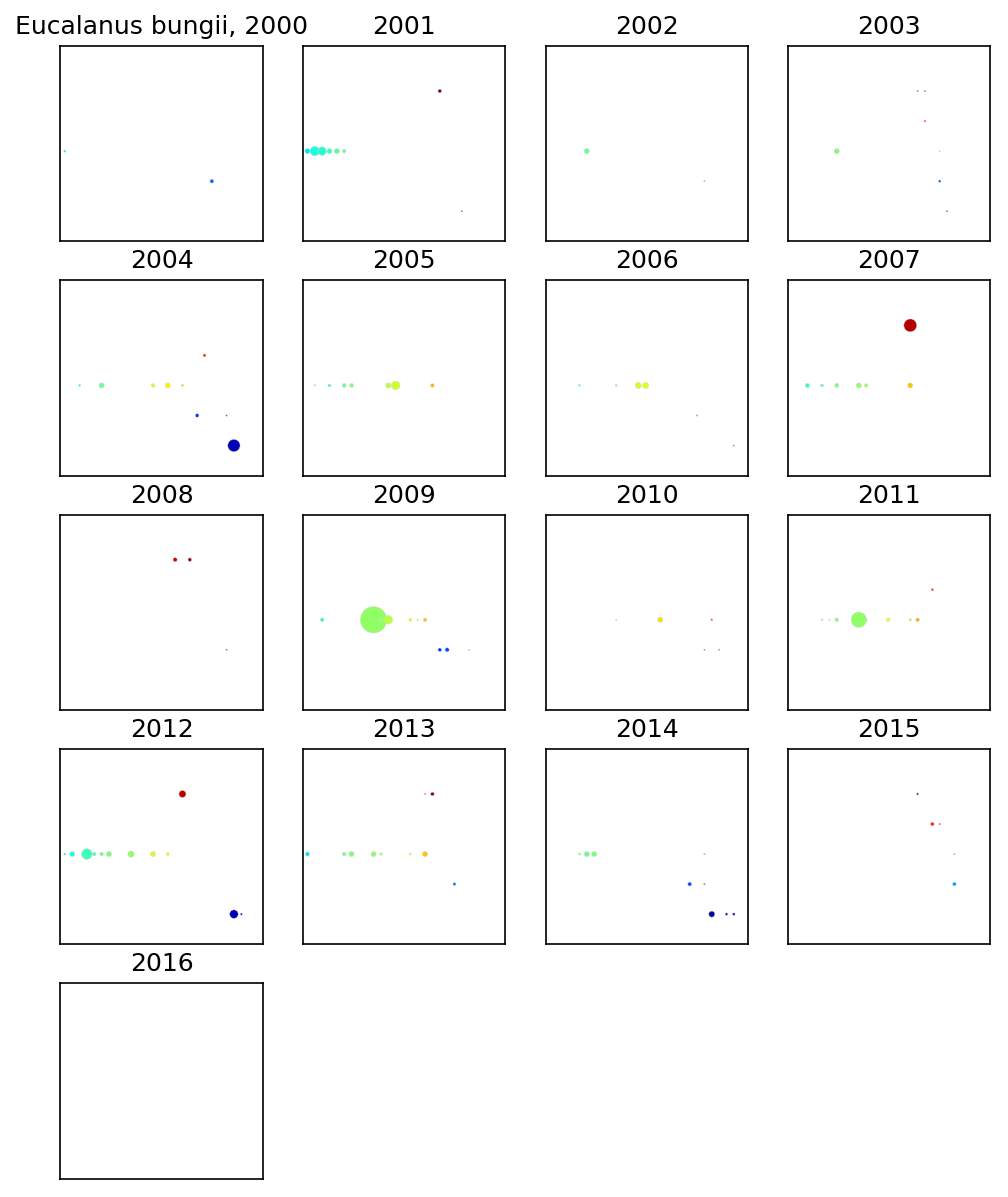

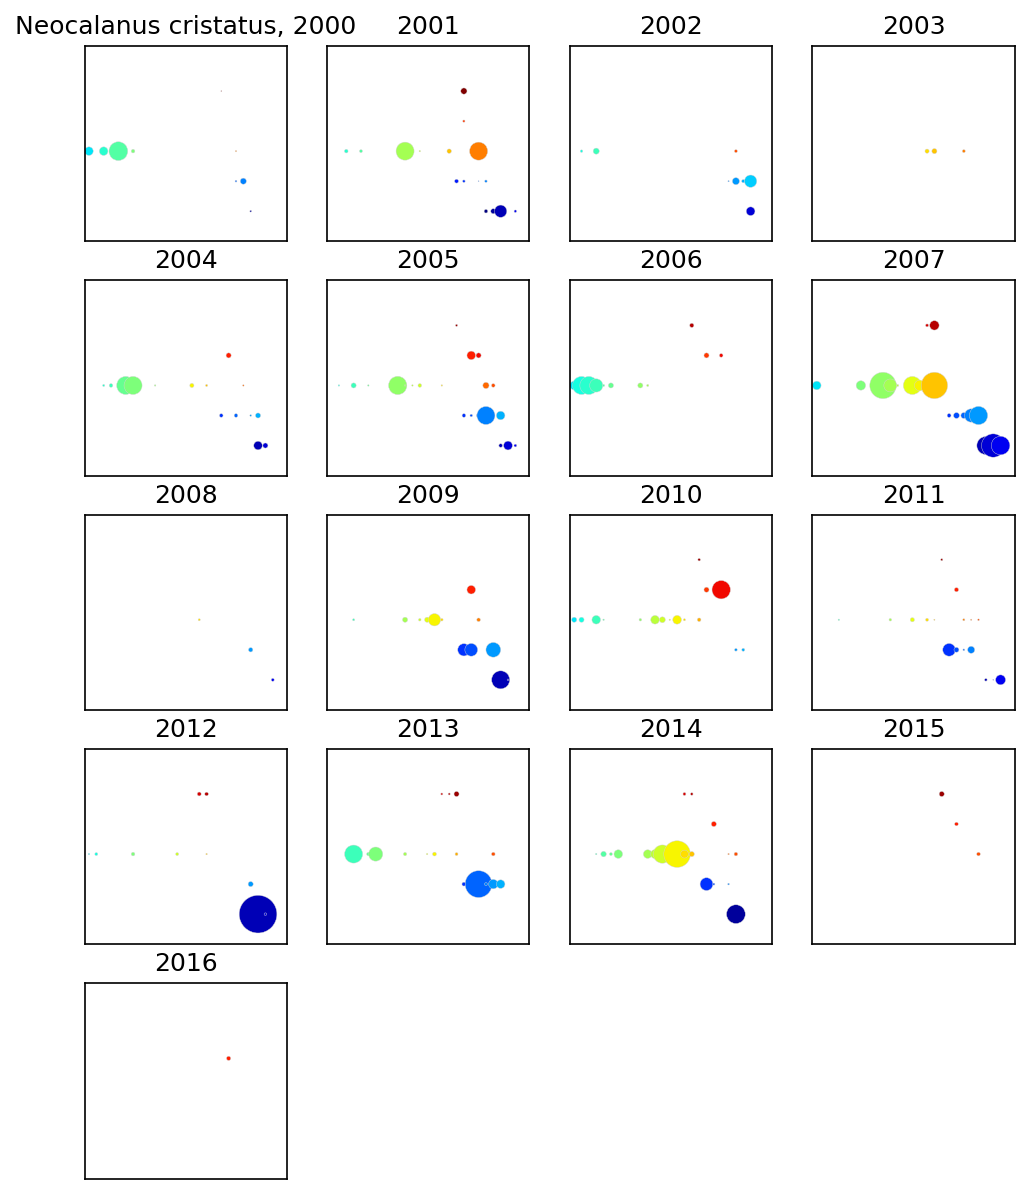

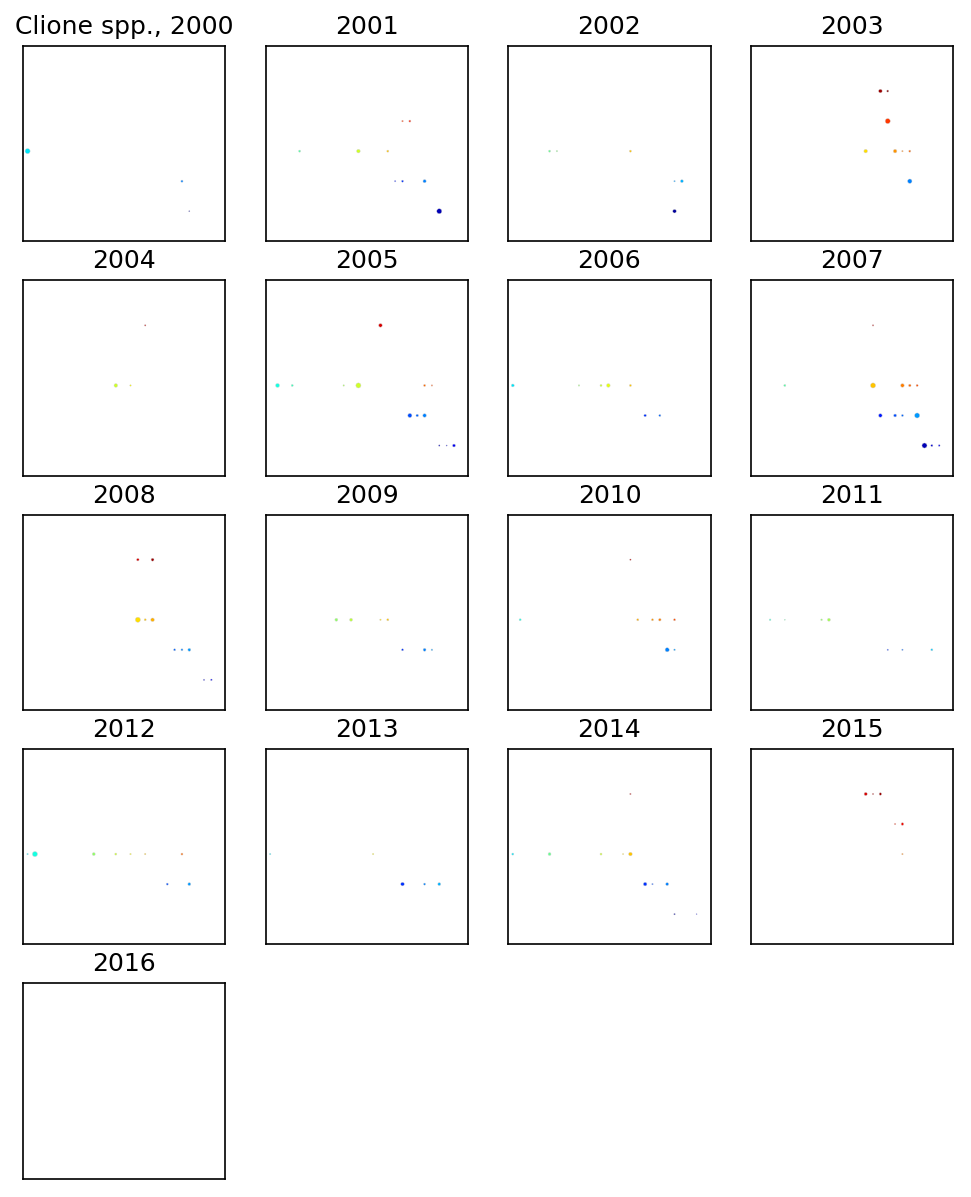

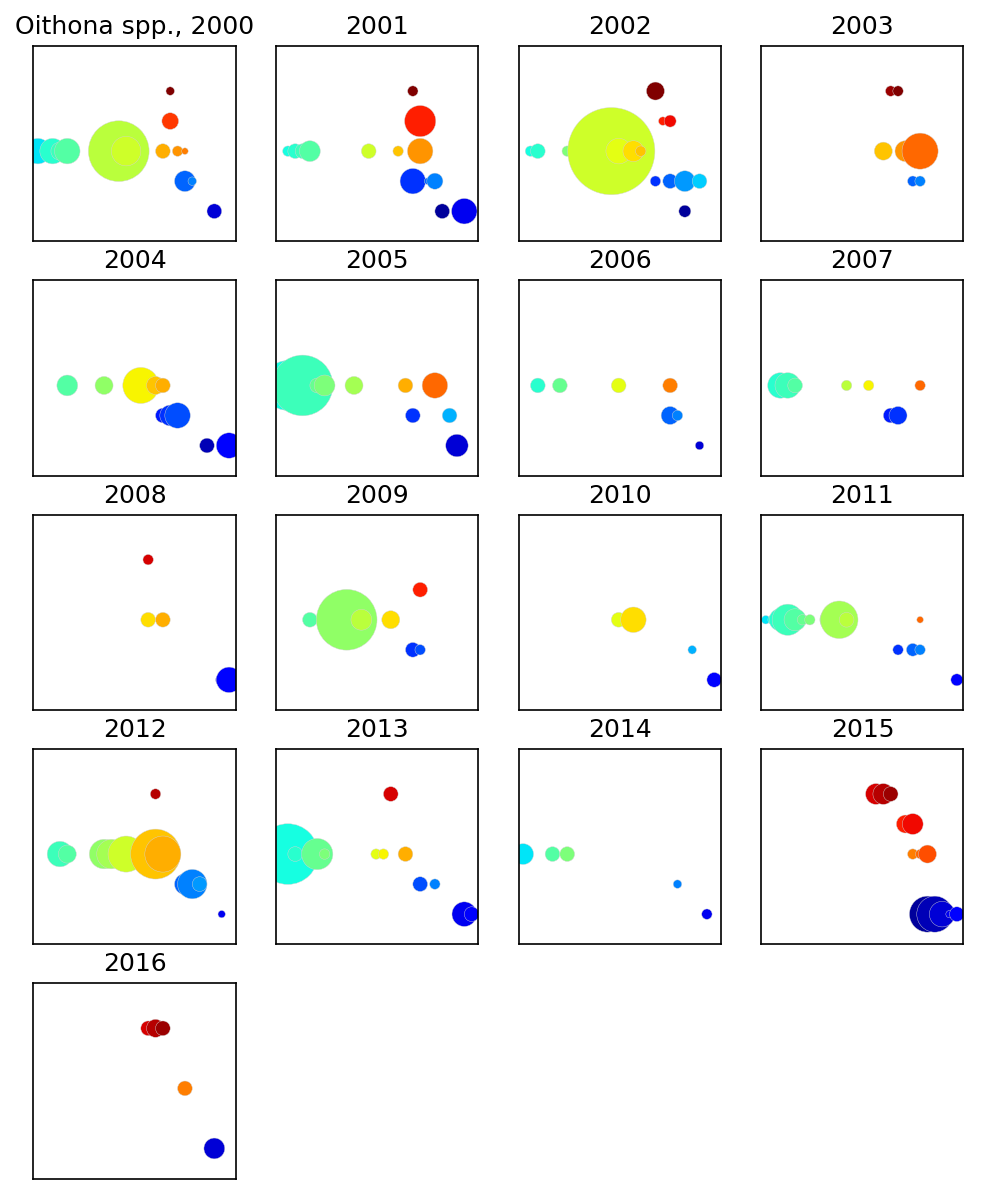

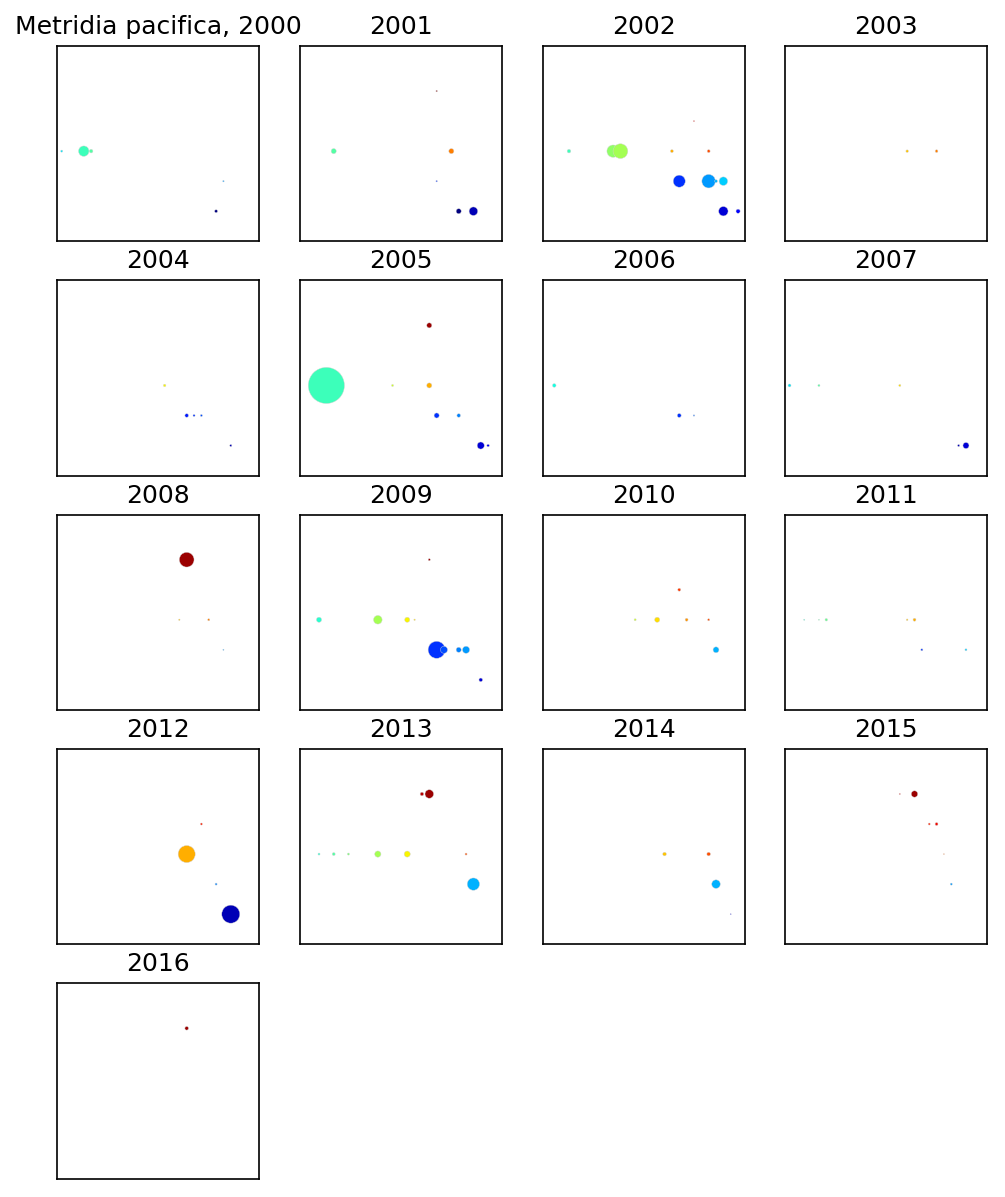

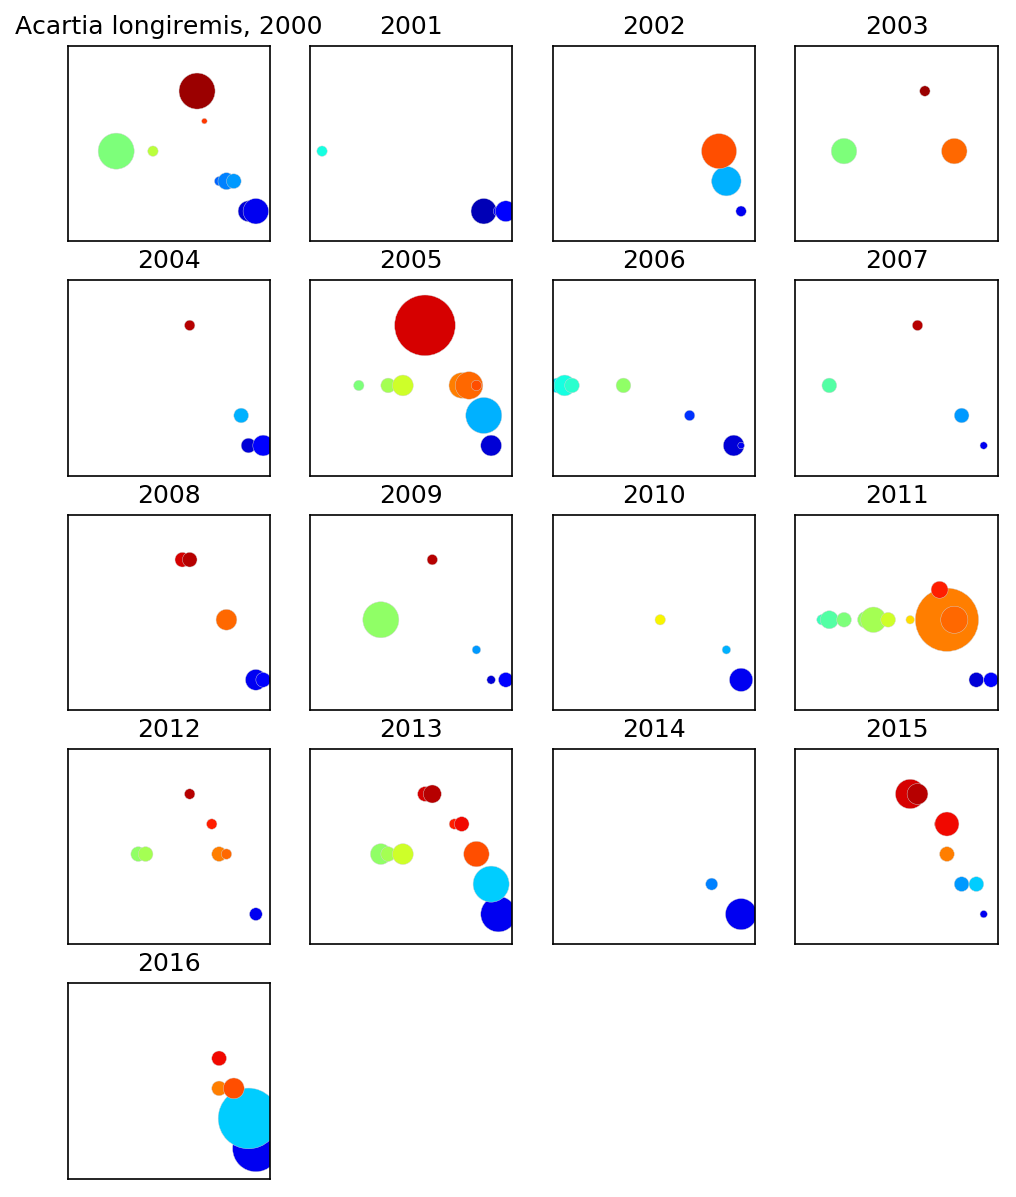

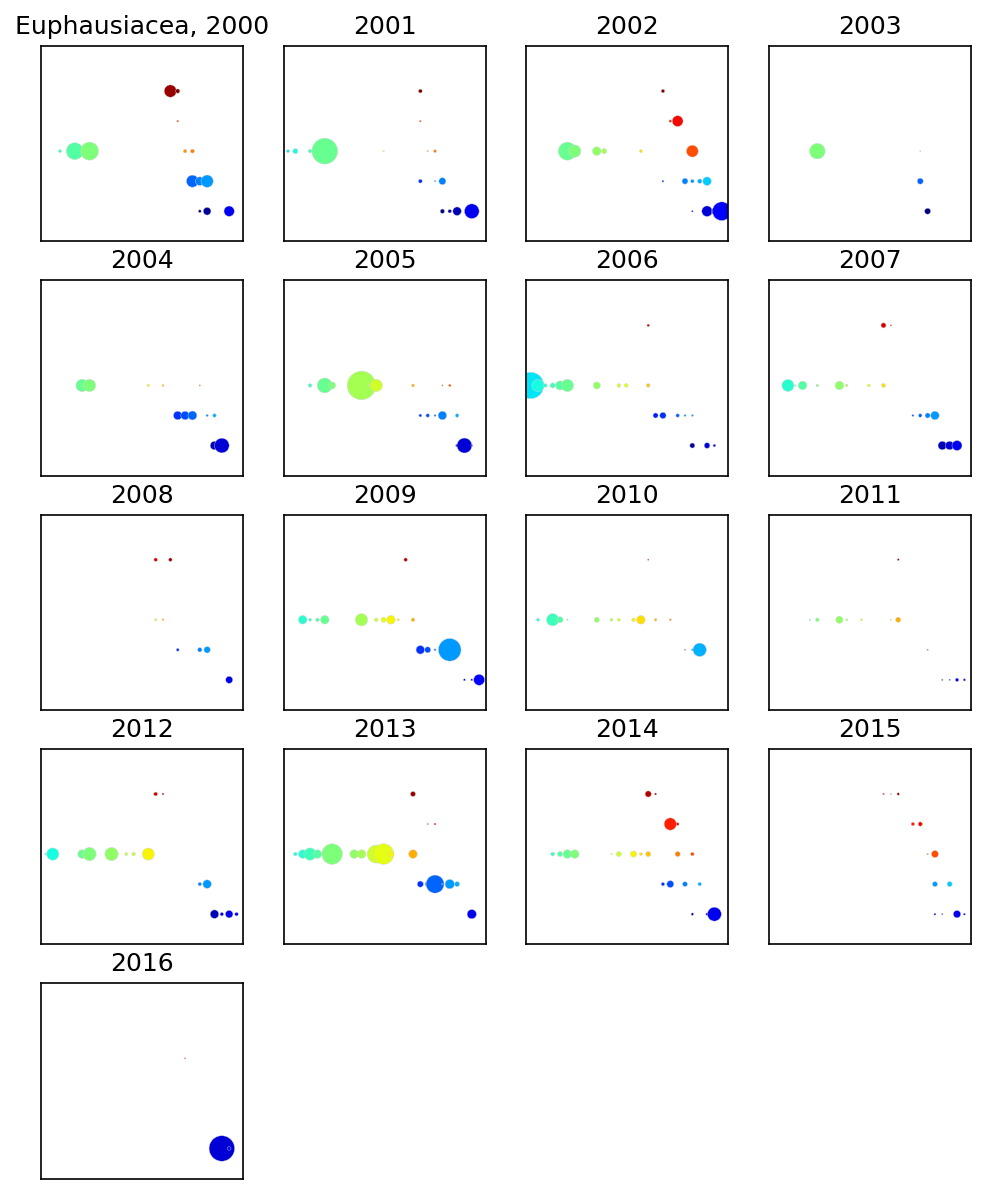

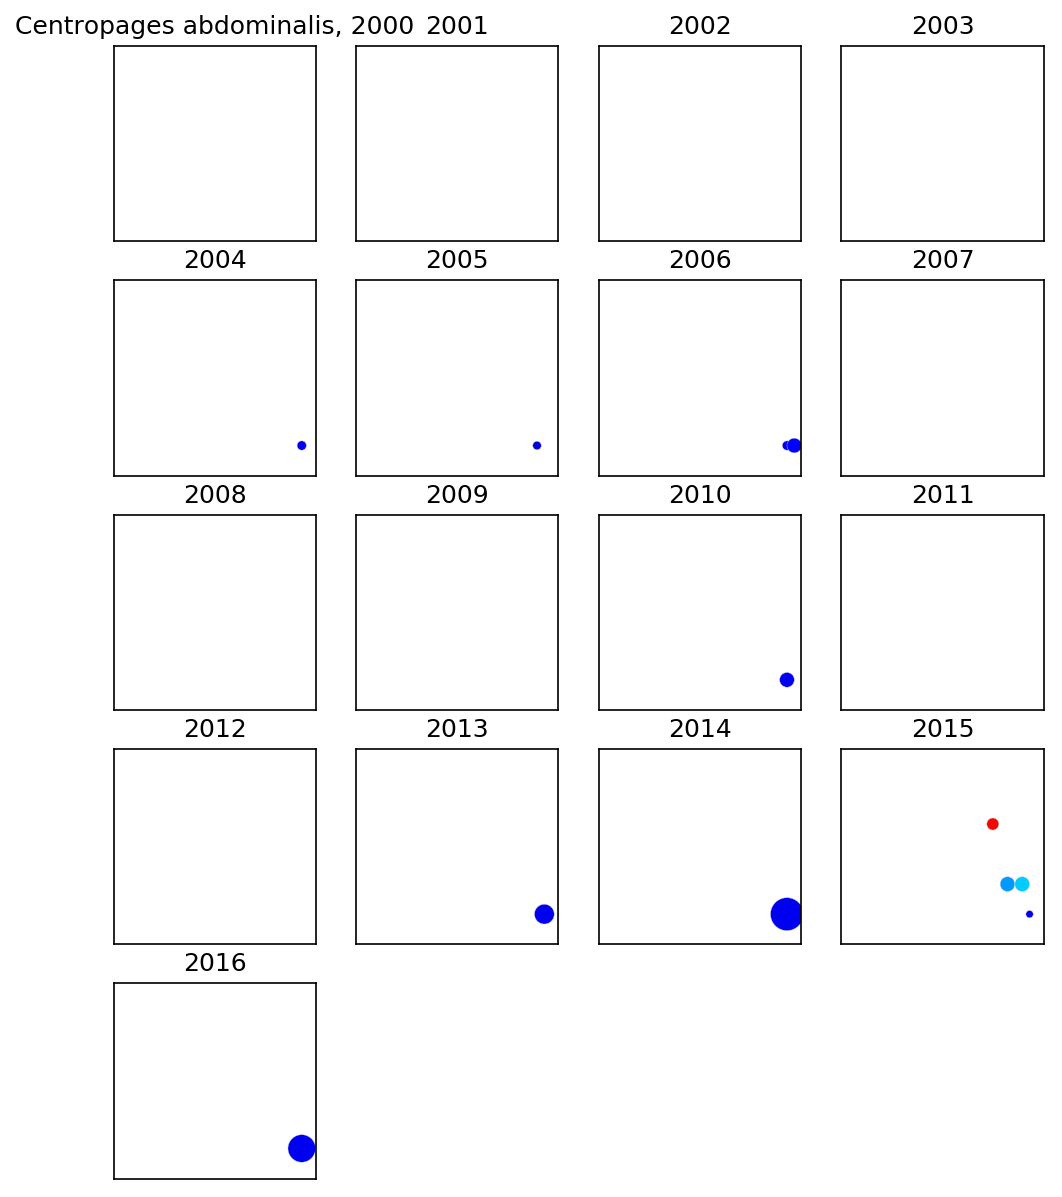

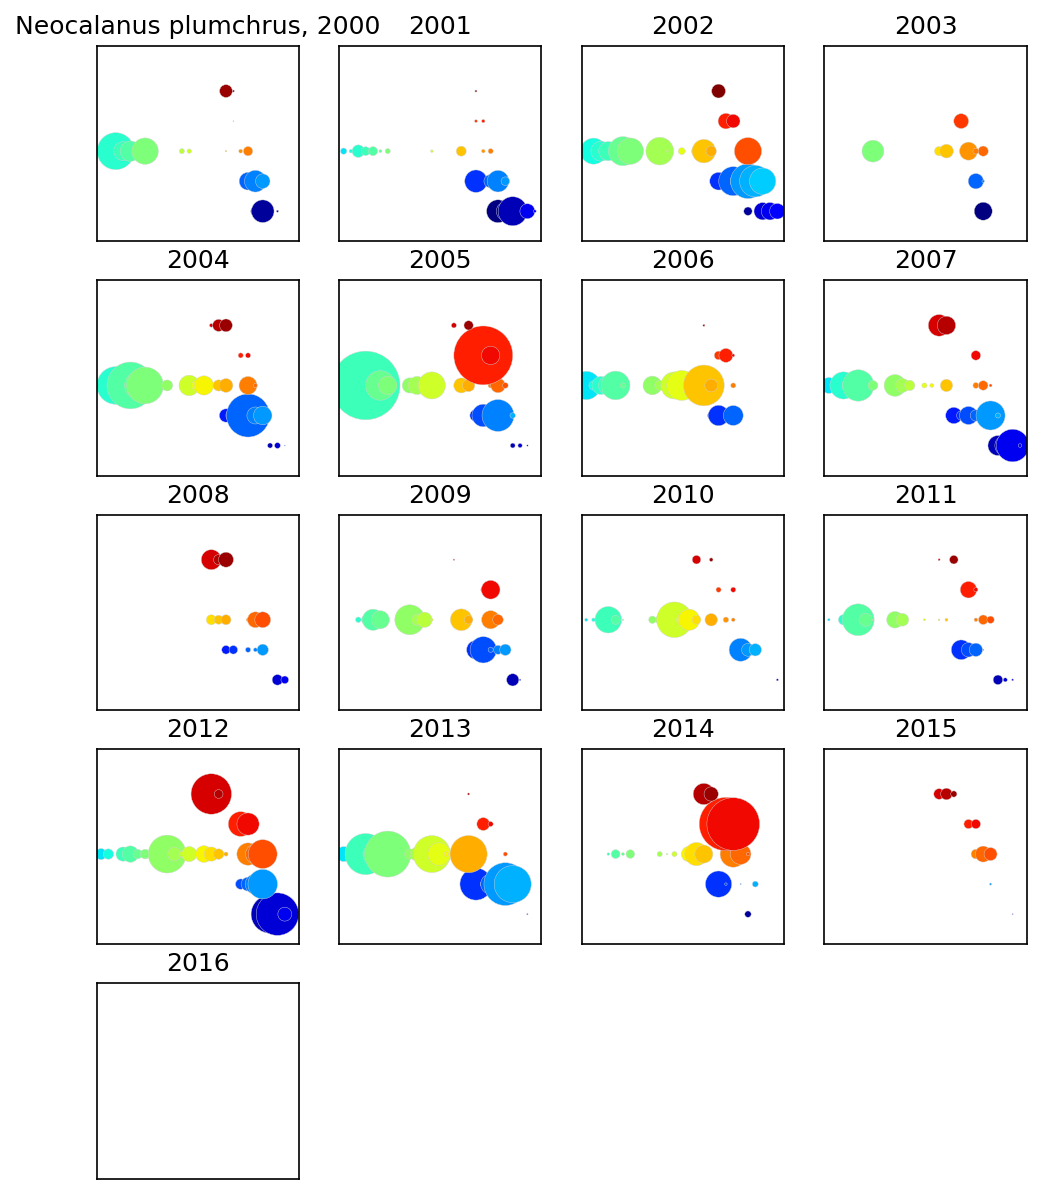

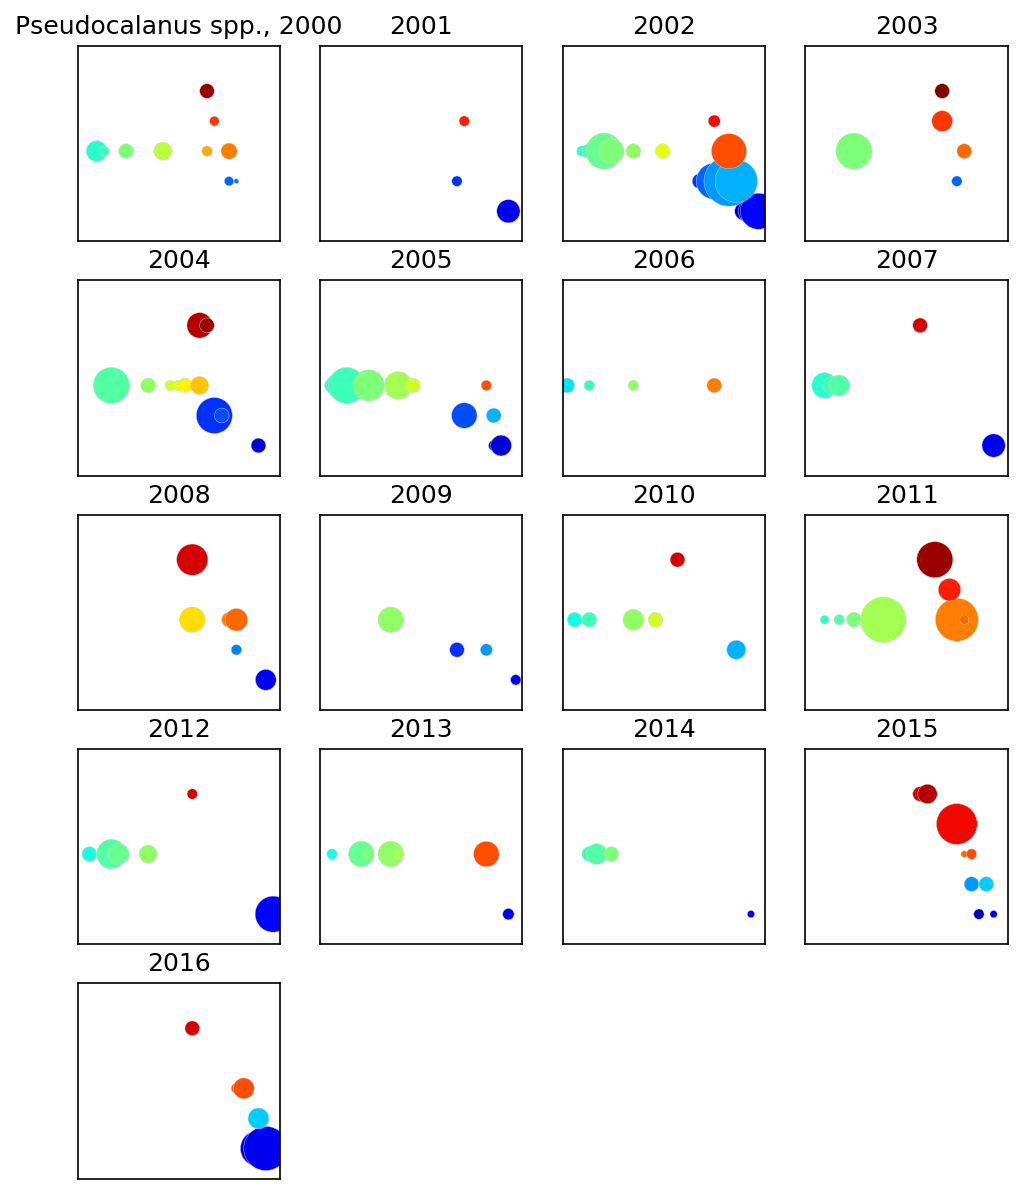

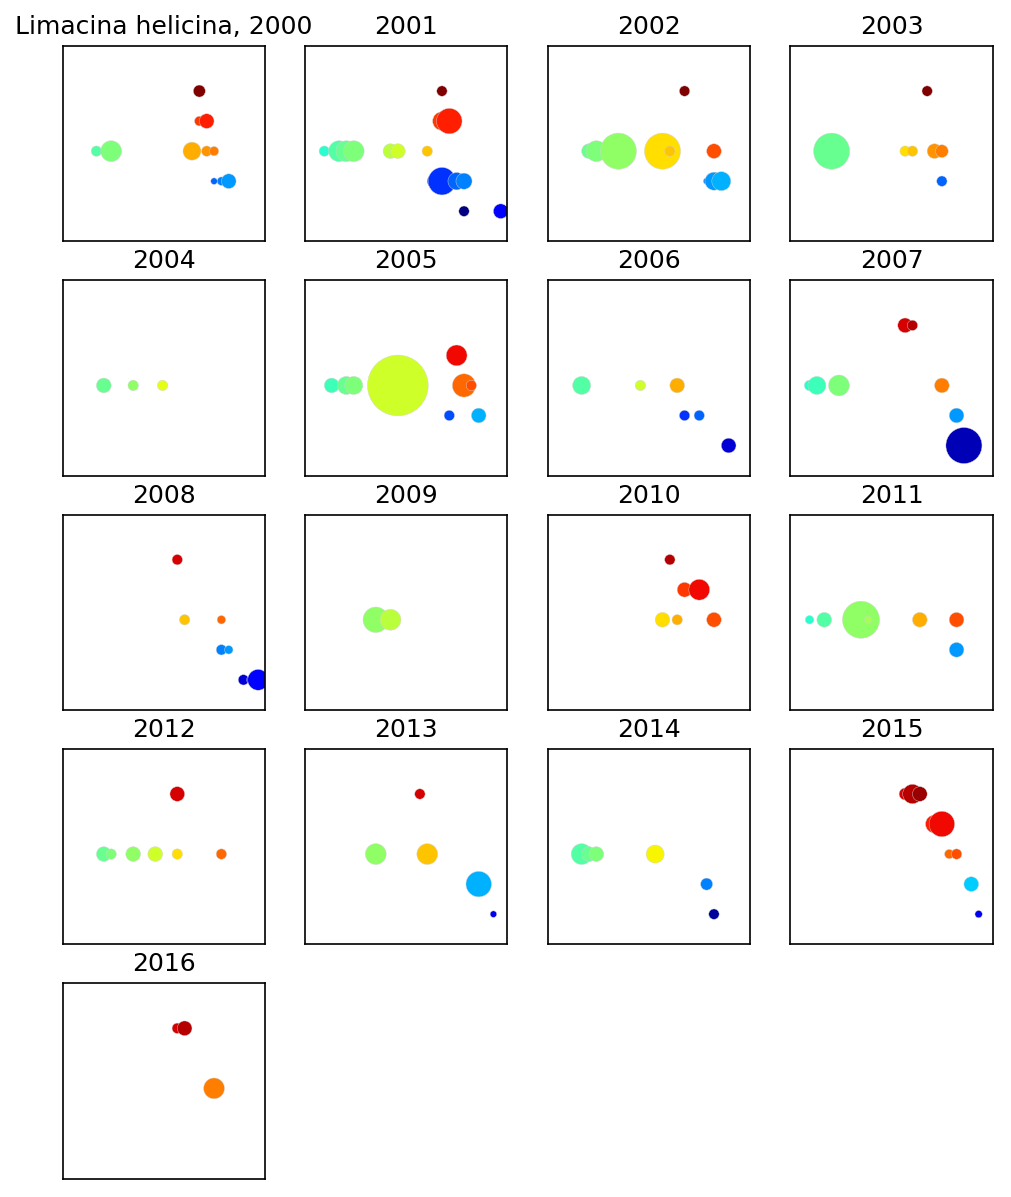

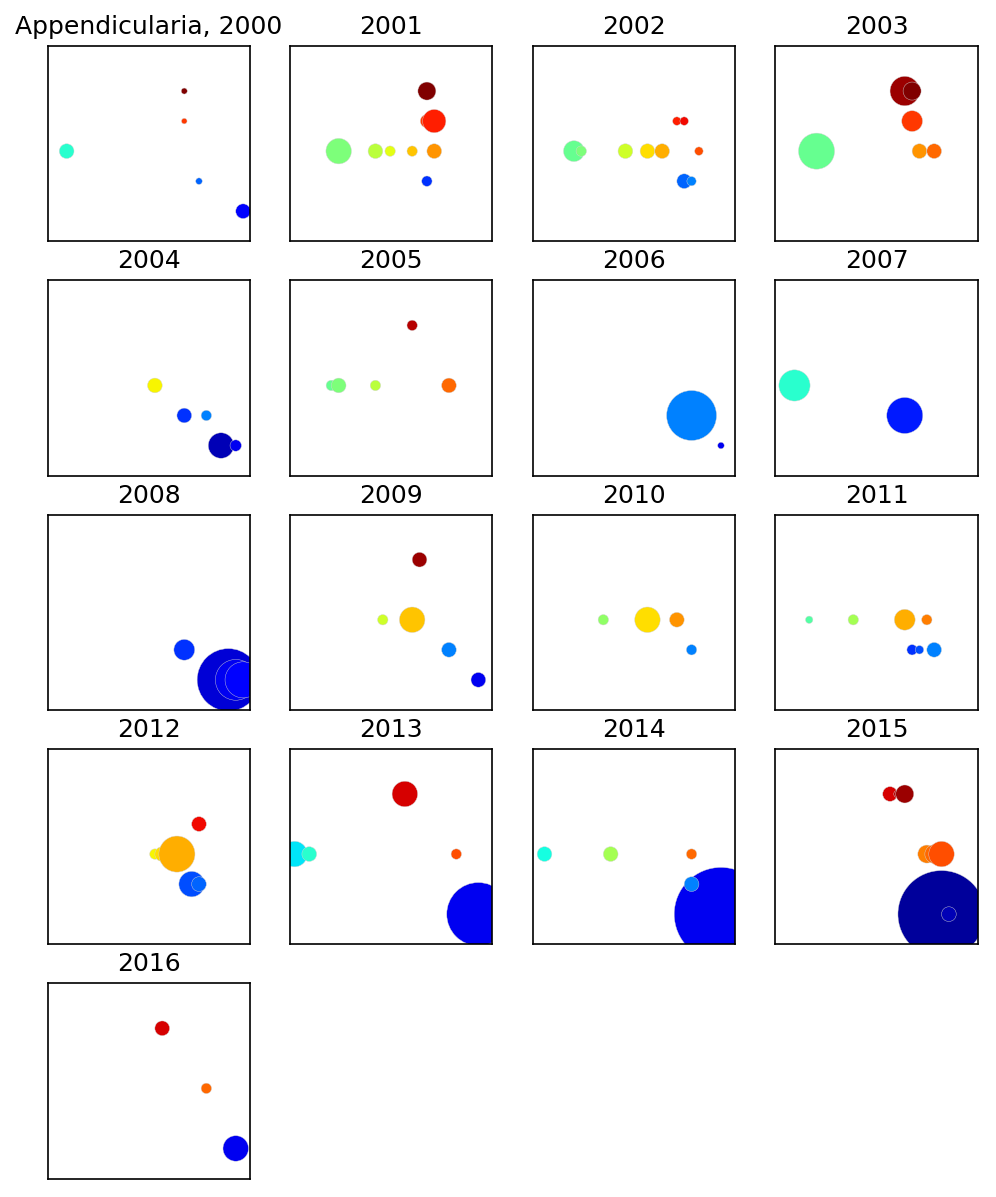

In [299]:
for i in range(18):
    fig = plt.figure(figsize=(8,10),dpi=150)
    for yi,y in enumerate(yrs):
        plt.subplot(5,4,yi+1)
        plt.scatter(coor['lon'],coor['lat'],c=coor.index.values,s=bingrpyrs[:,i,yi],cmap='jet',vmin=0,vmax=40,edgecolor='lightgray',linewidth=0.2)
        if yi==0:
            plt.title(sgr[i]+', '+str(y))
        else:
            plt.title(str(y))
        plt.xlim((-180,-125))
        plt.ylim((48,61))
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
    plt.savefig('../figures/allpoints/groups_relabunperyear_'+str(i)+'.png')

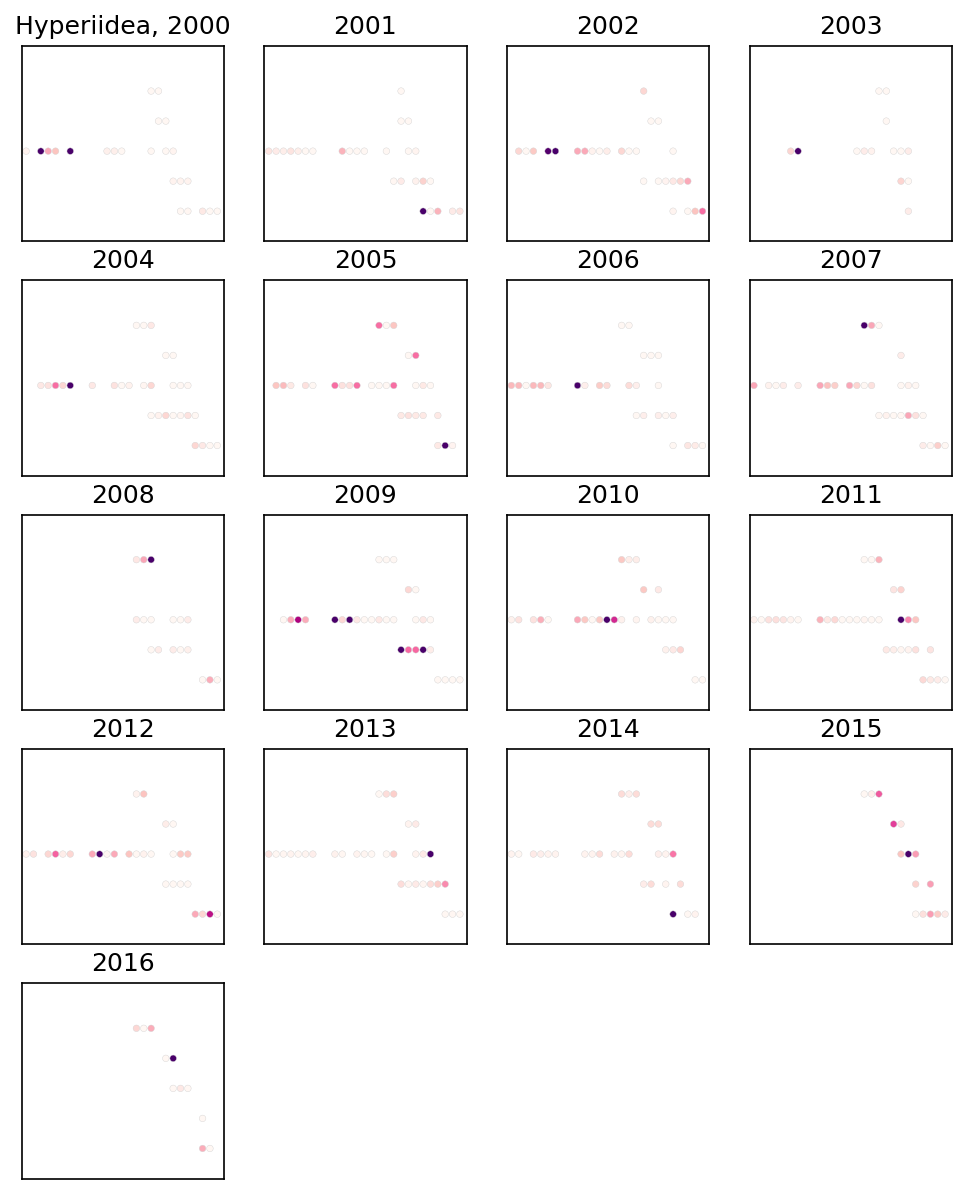

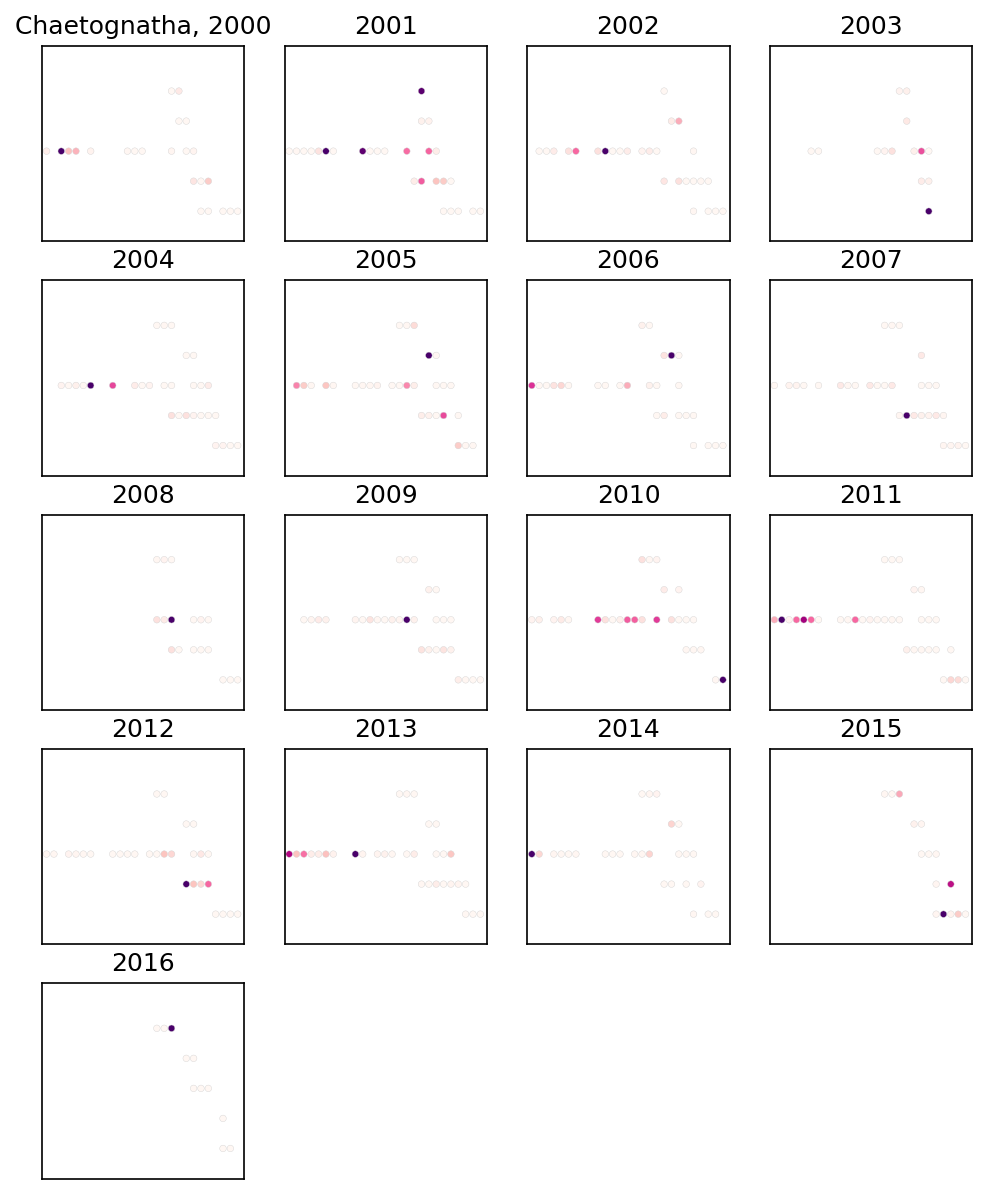

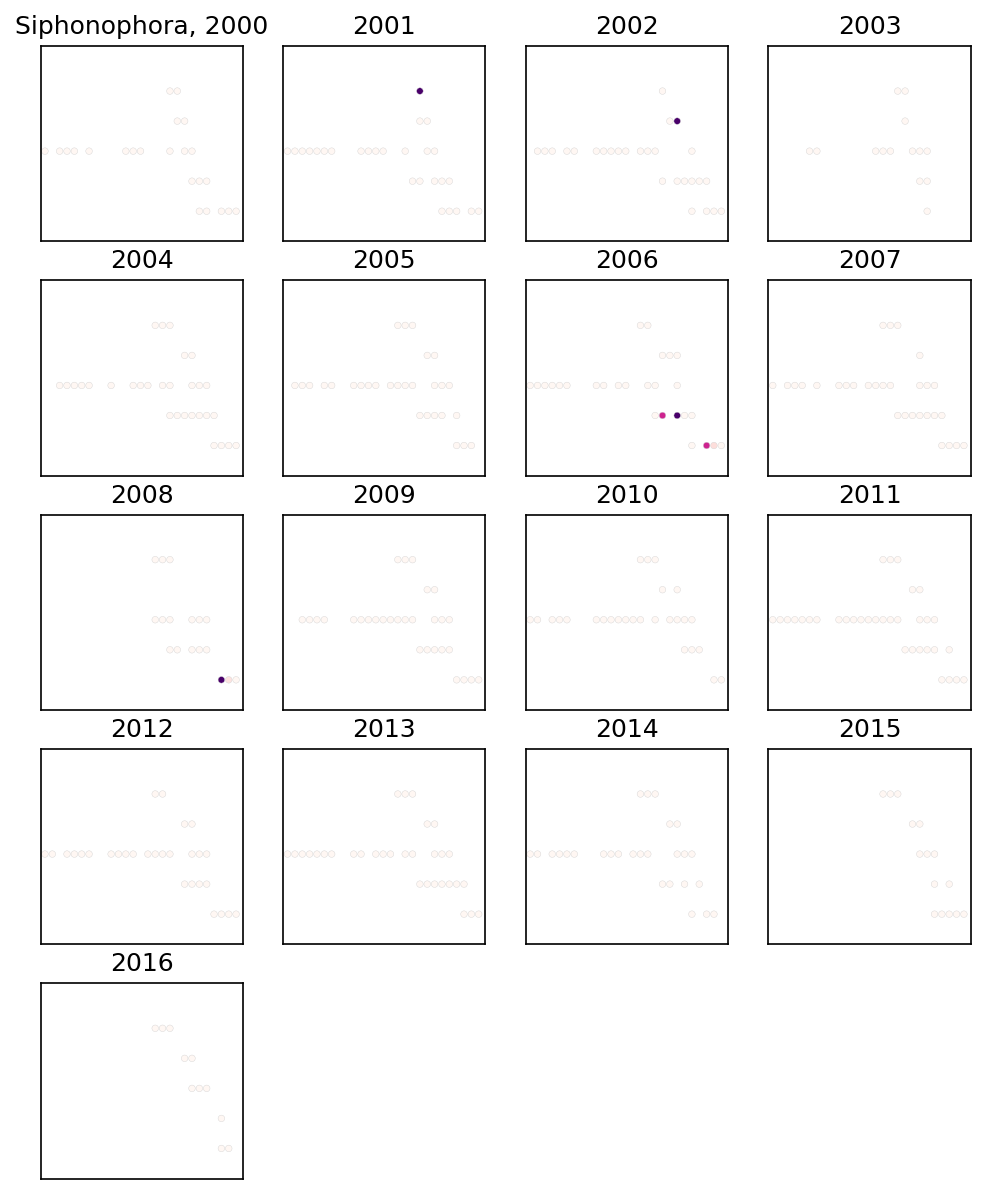

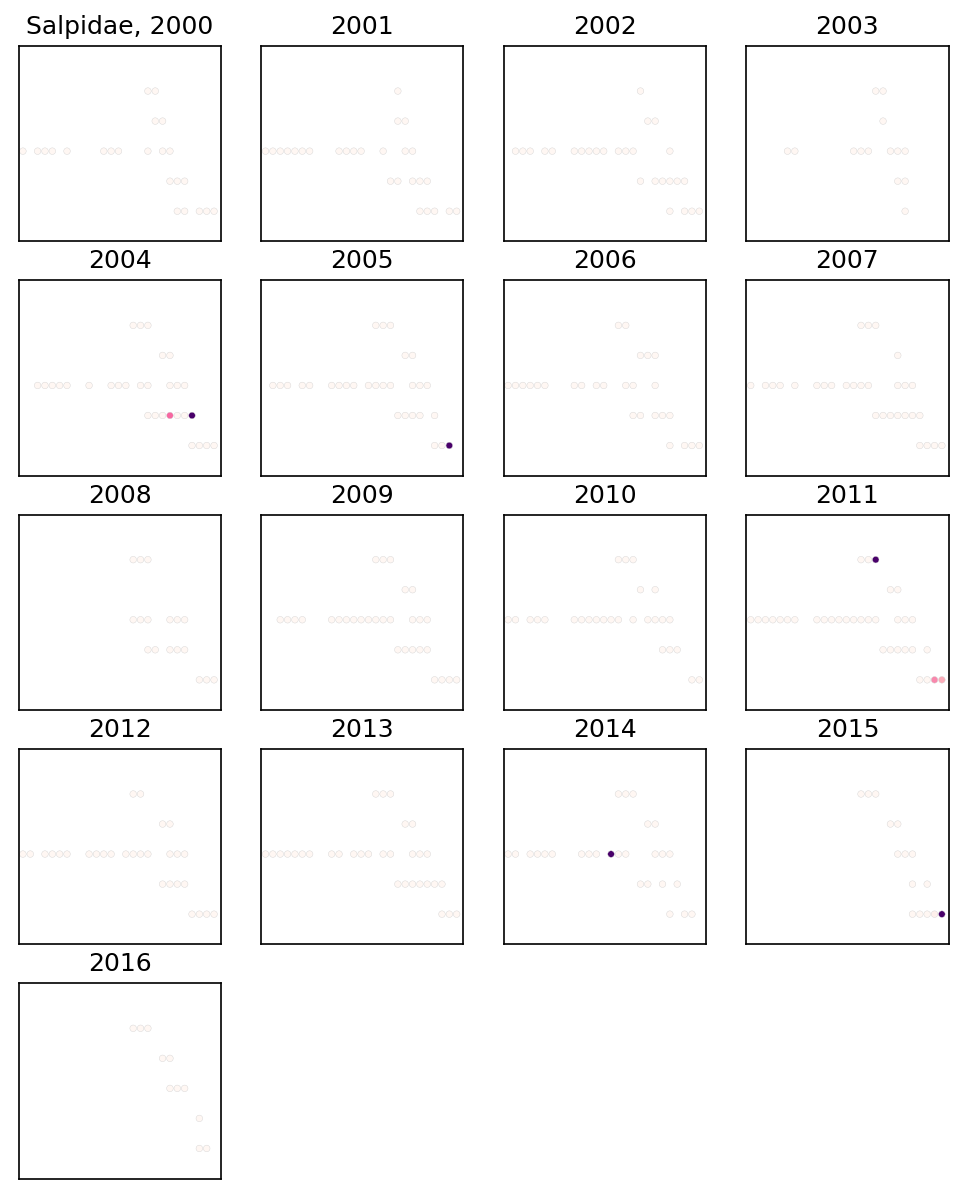

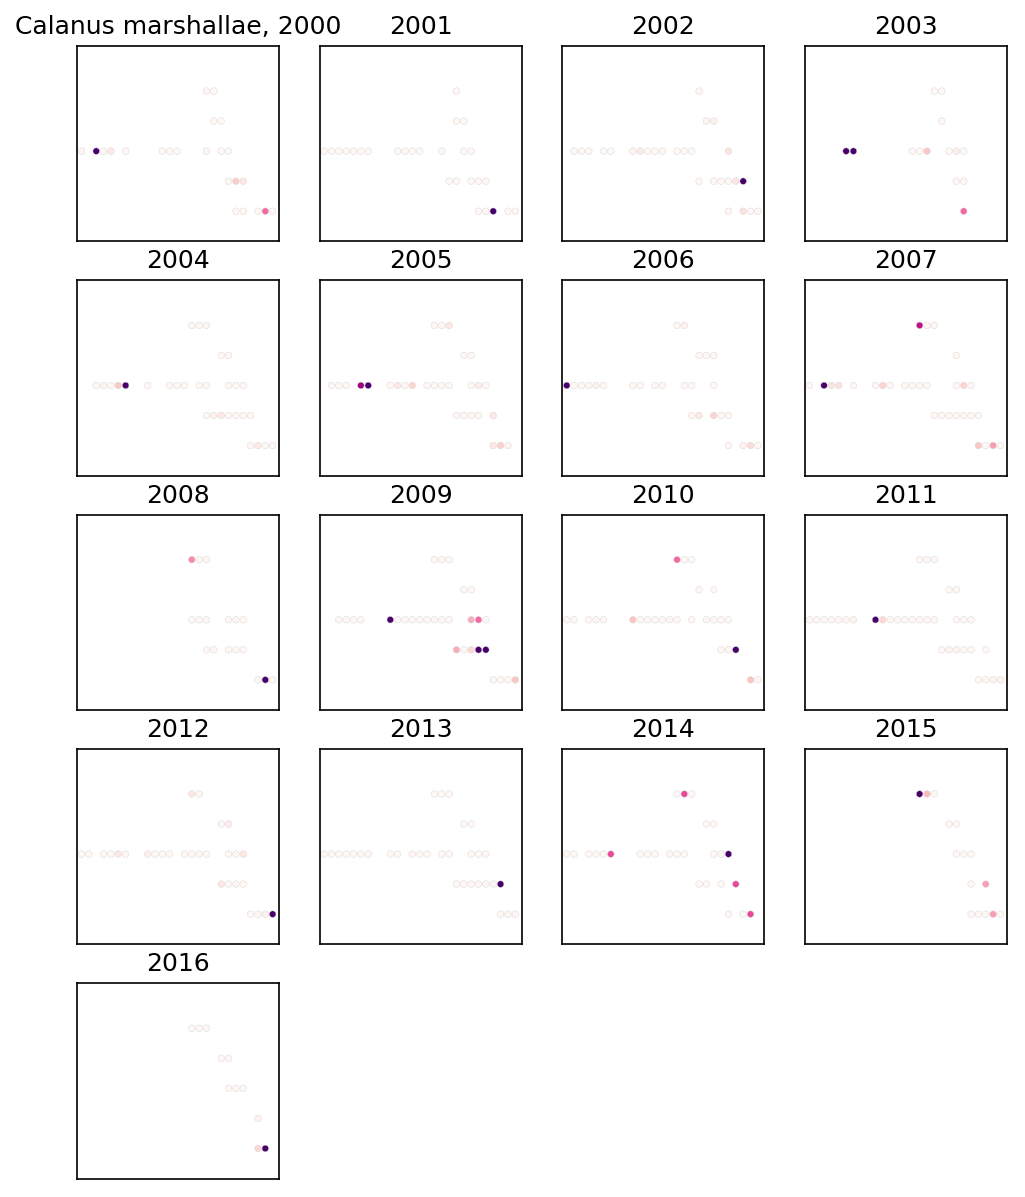

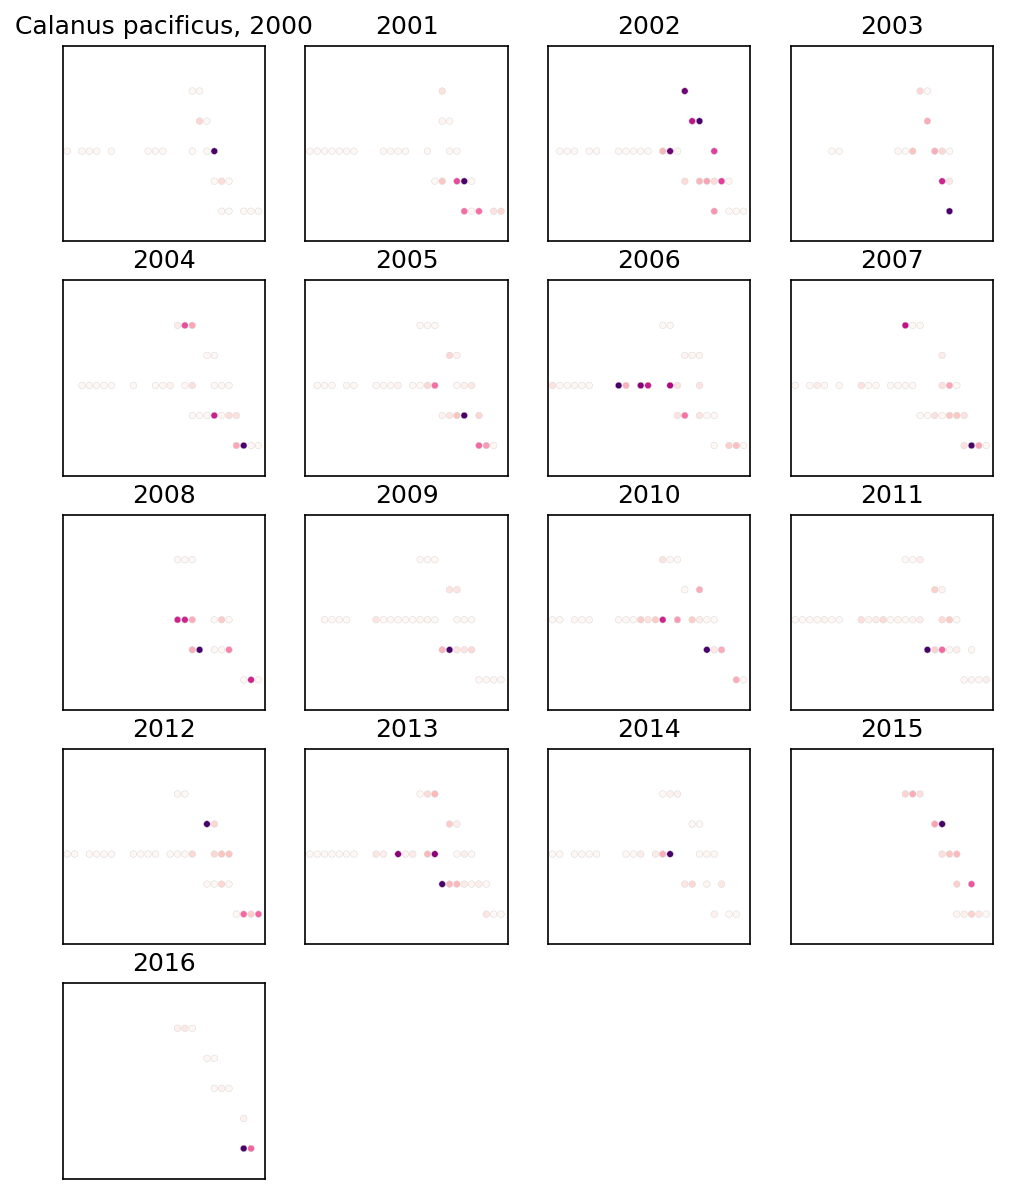

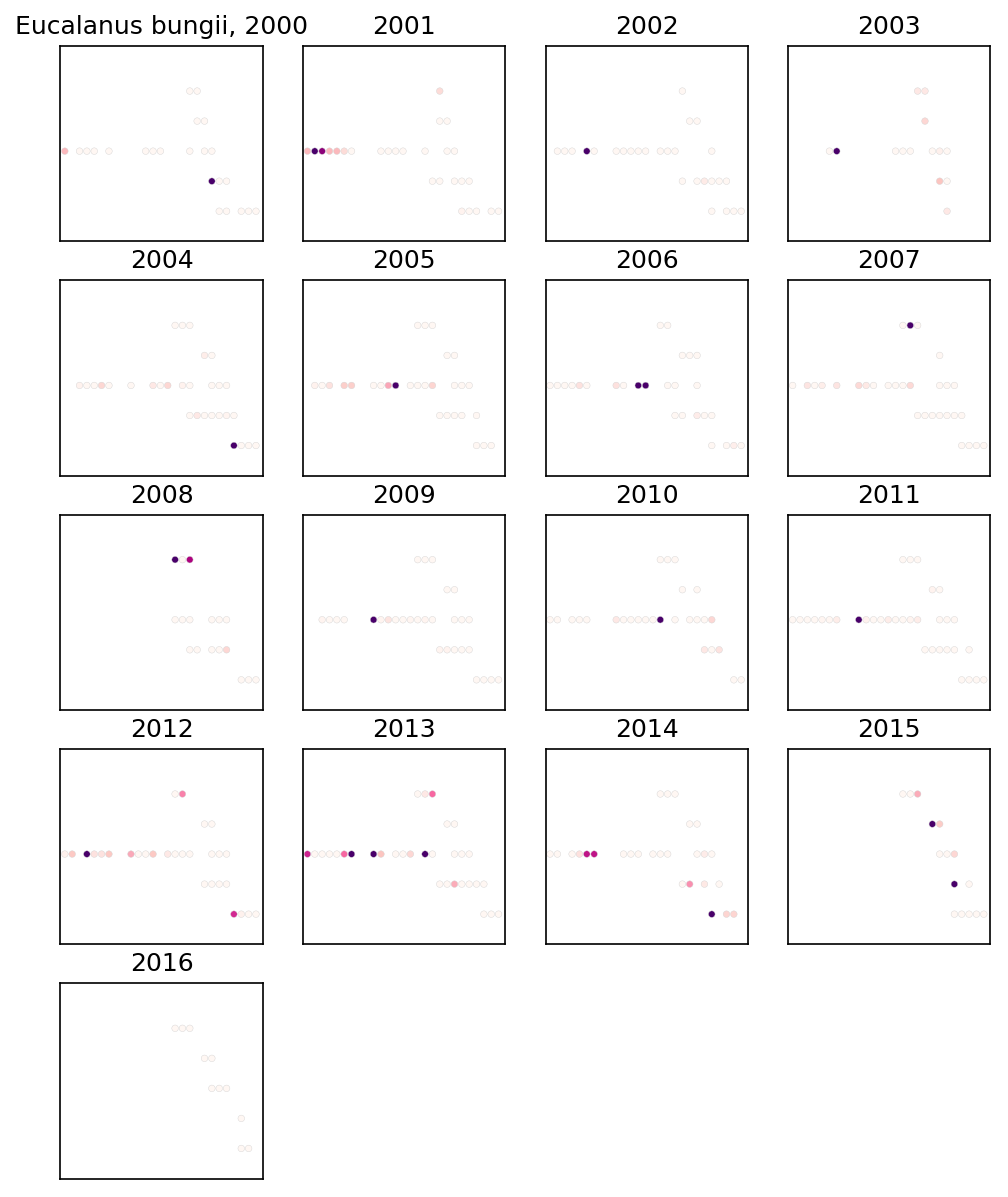

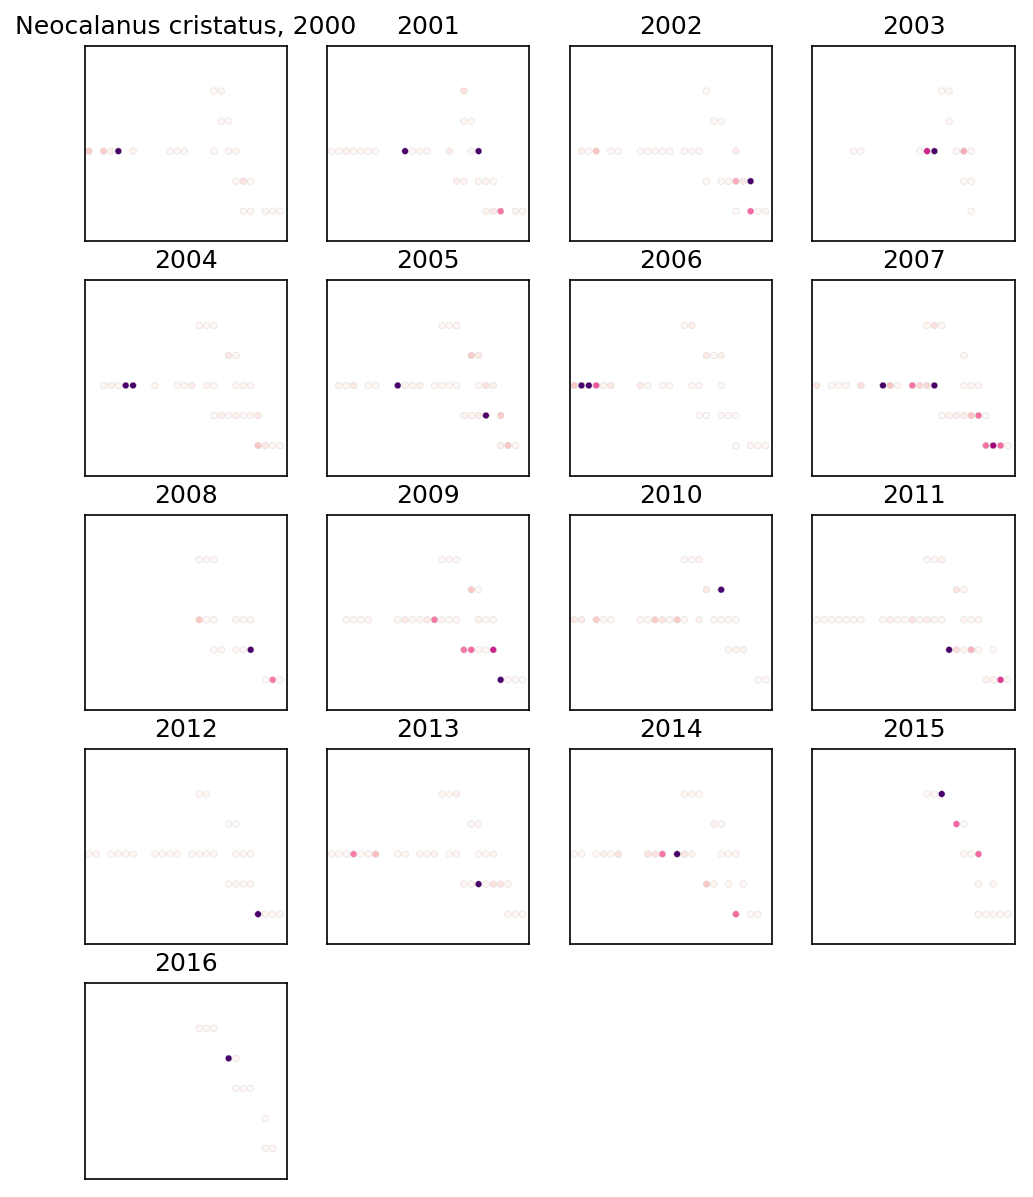

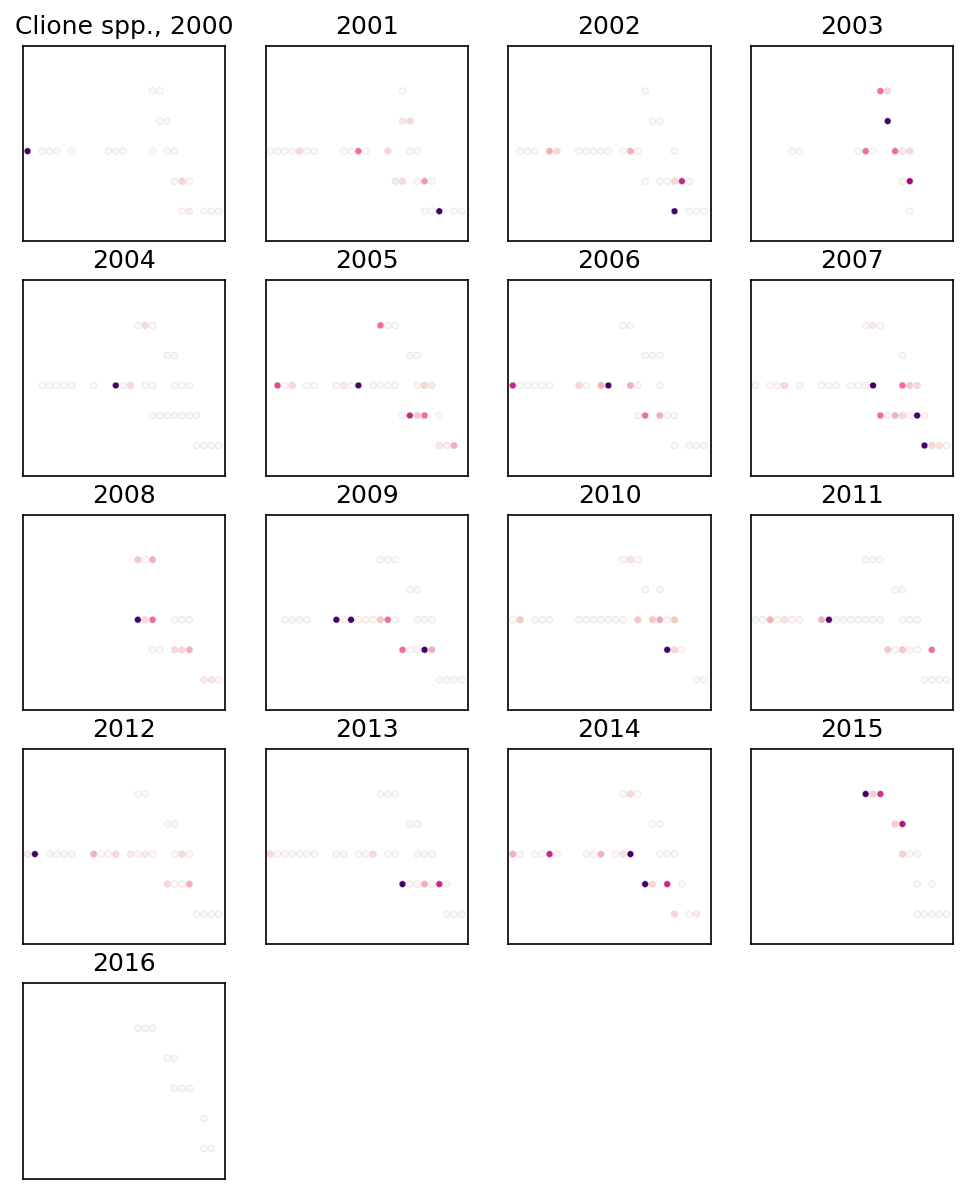

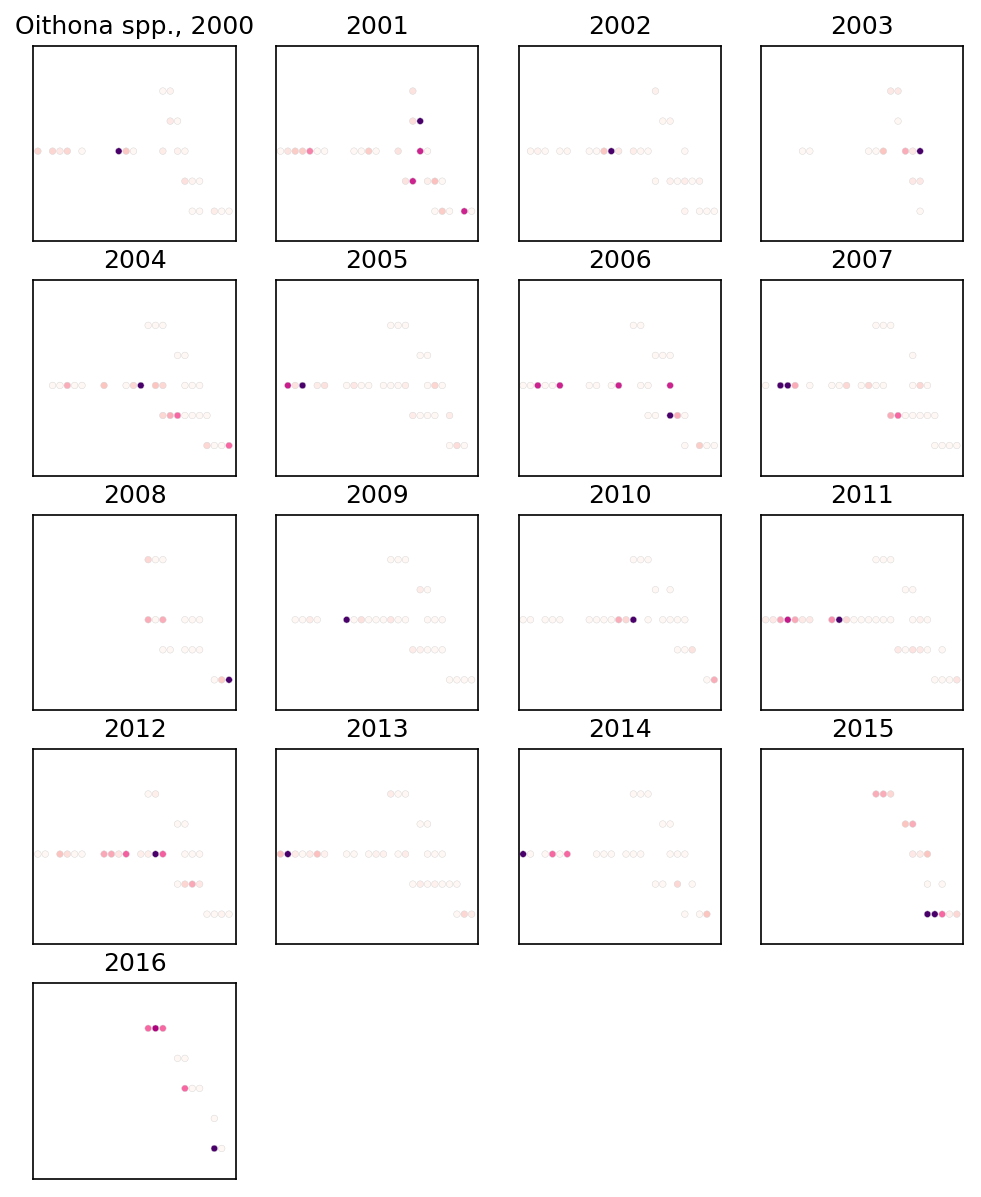

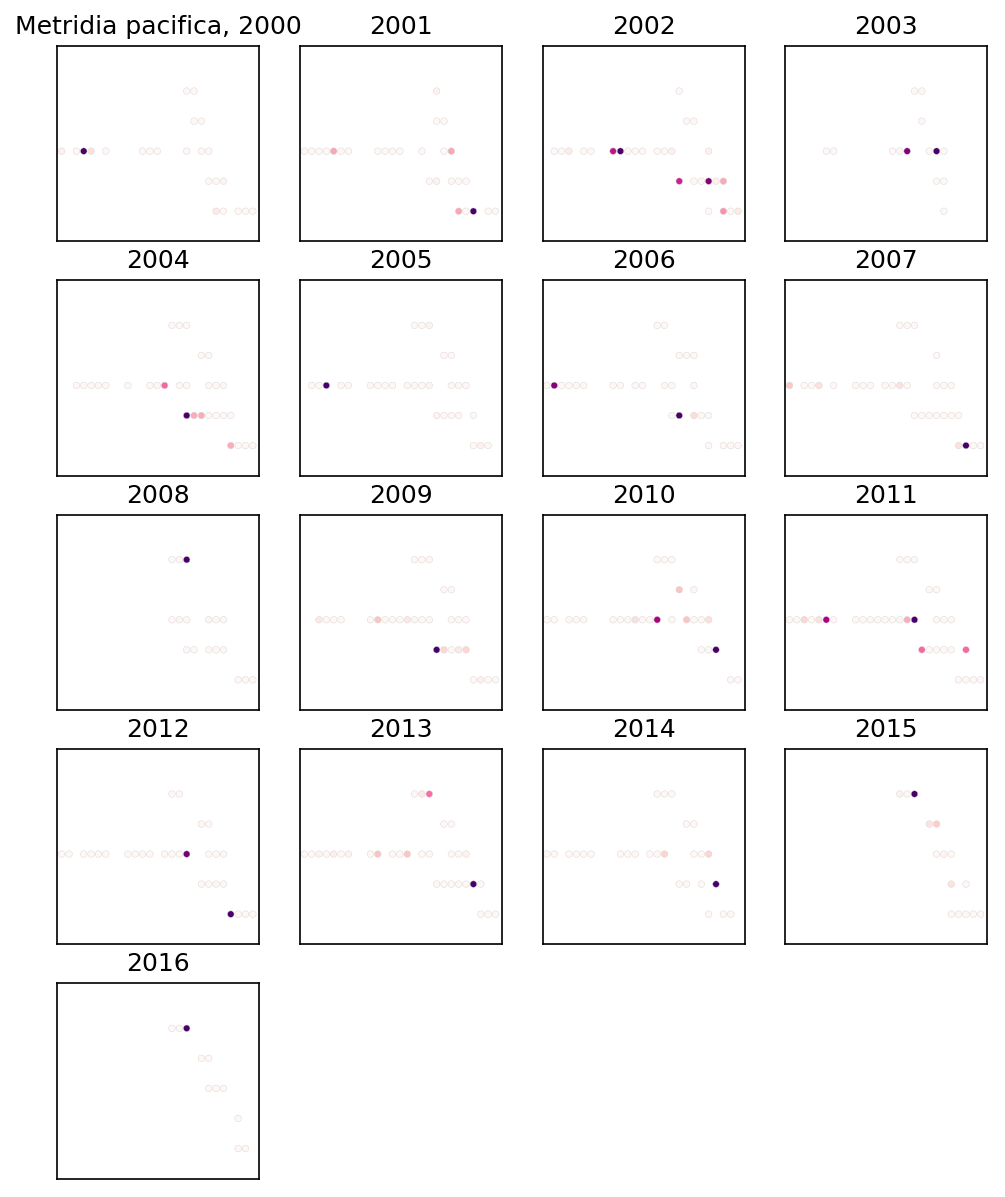

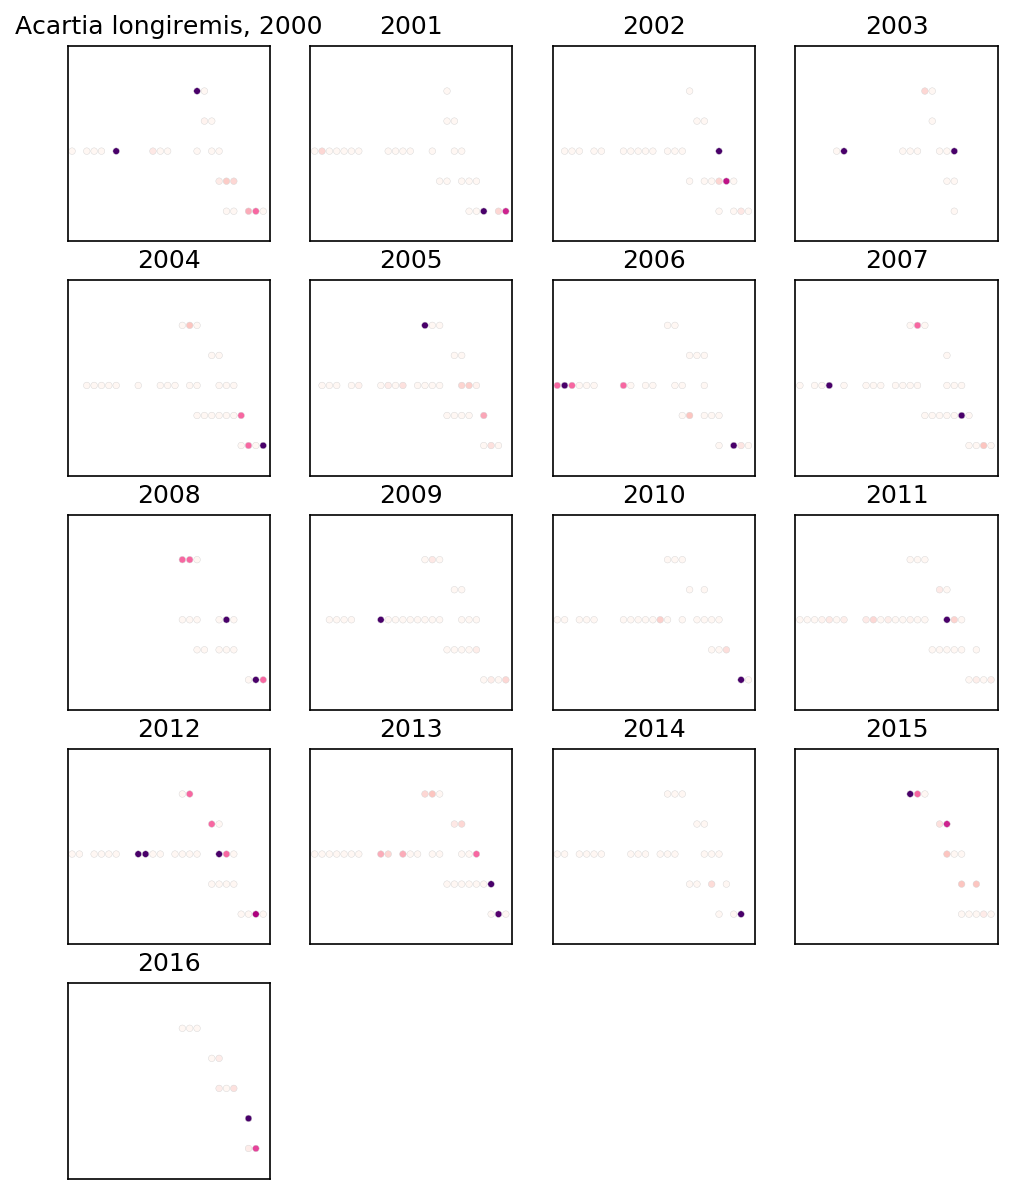

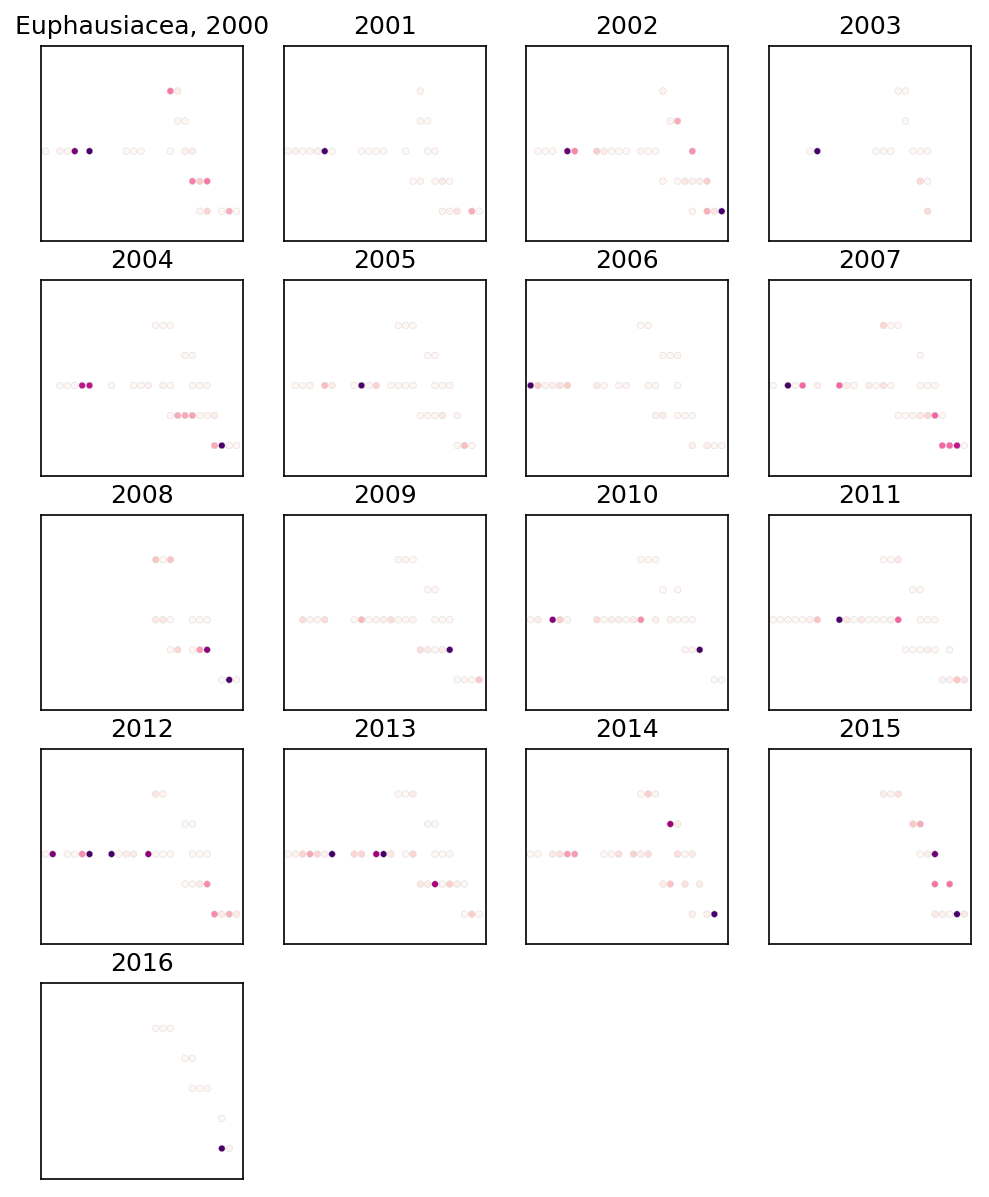

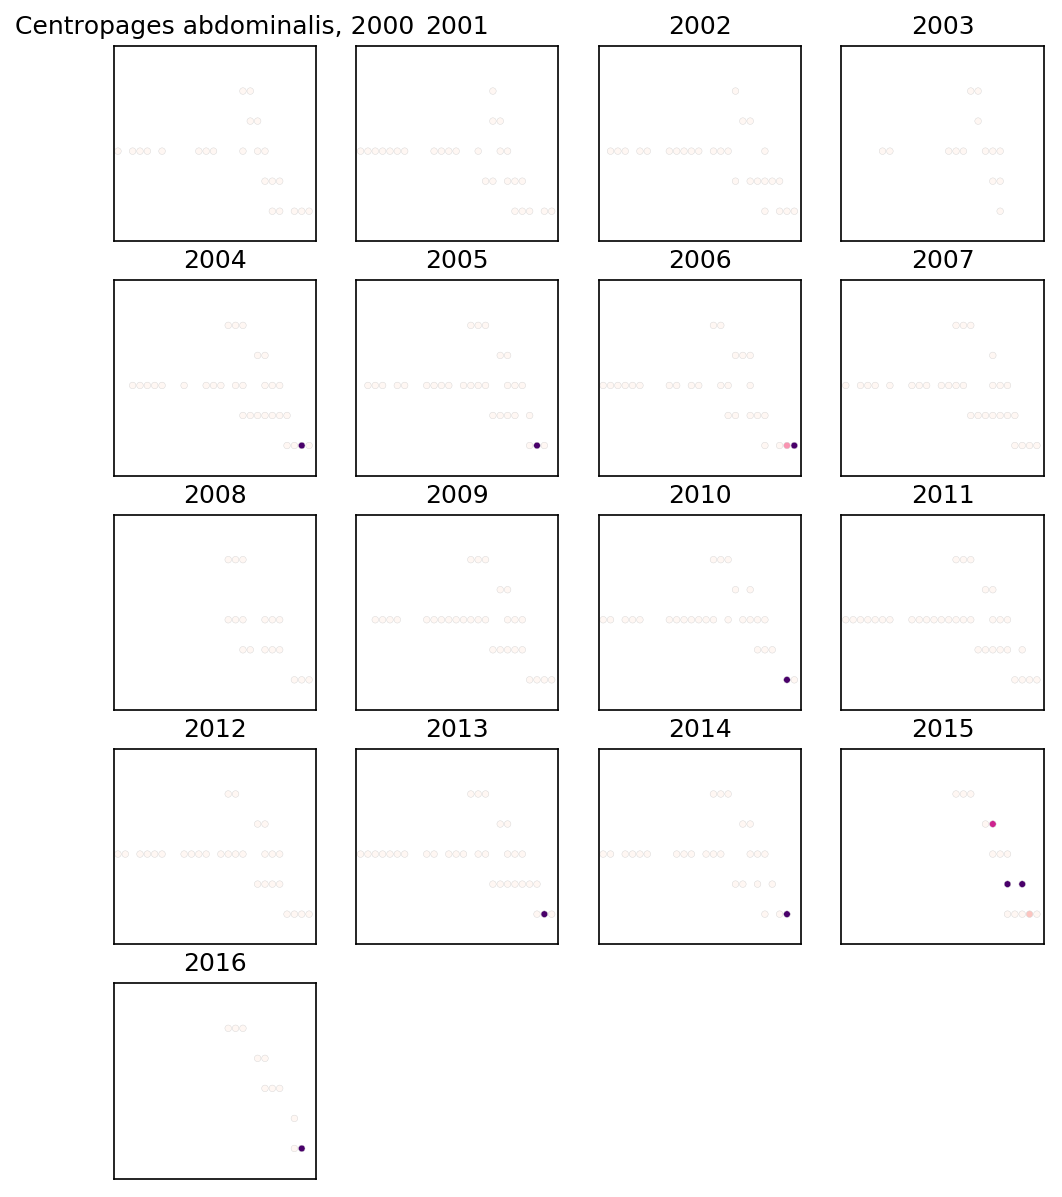

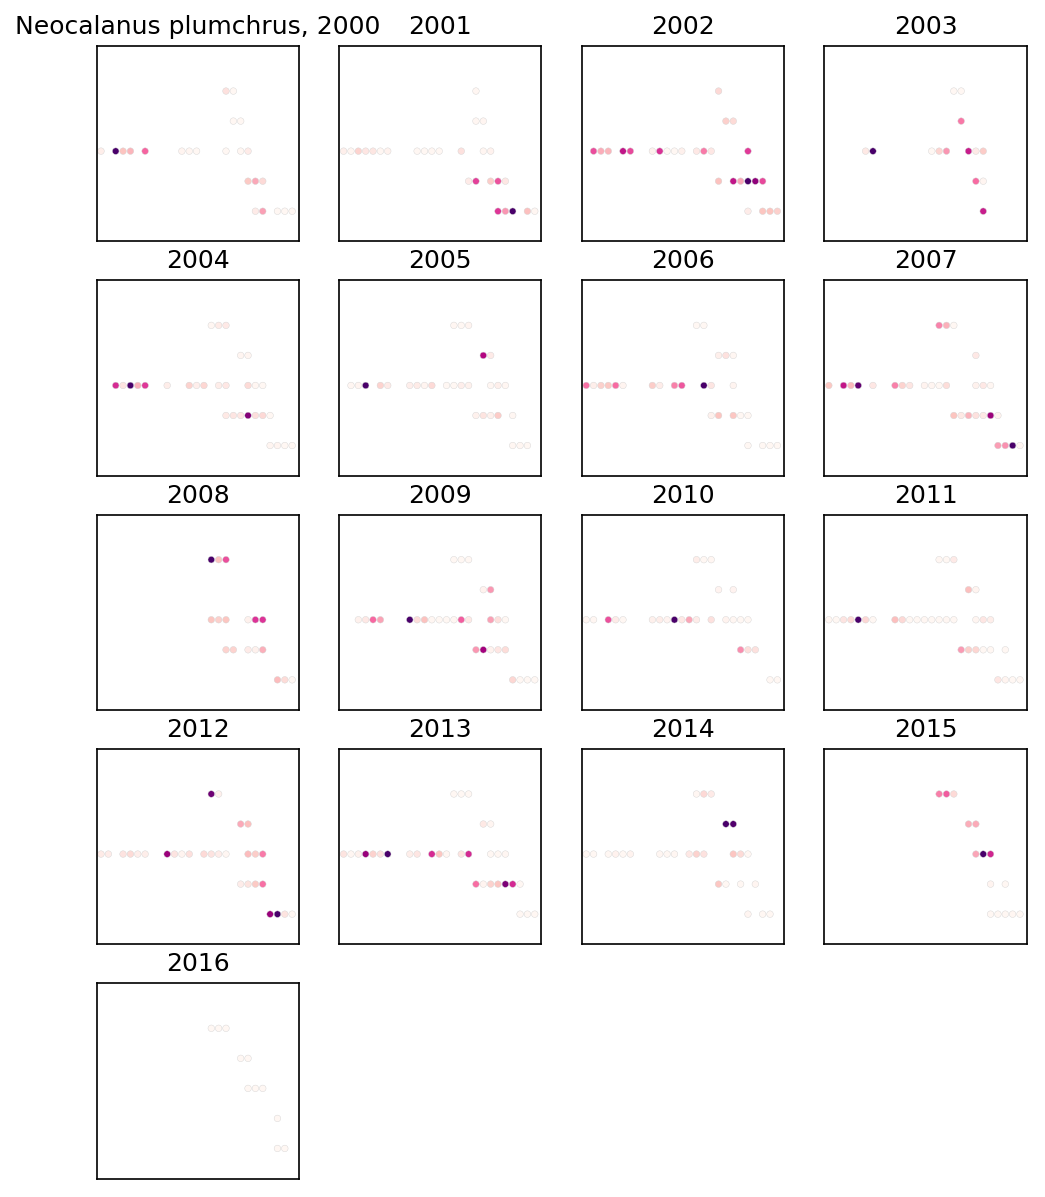

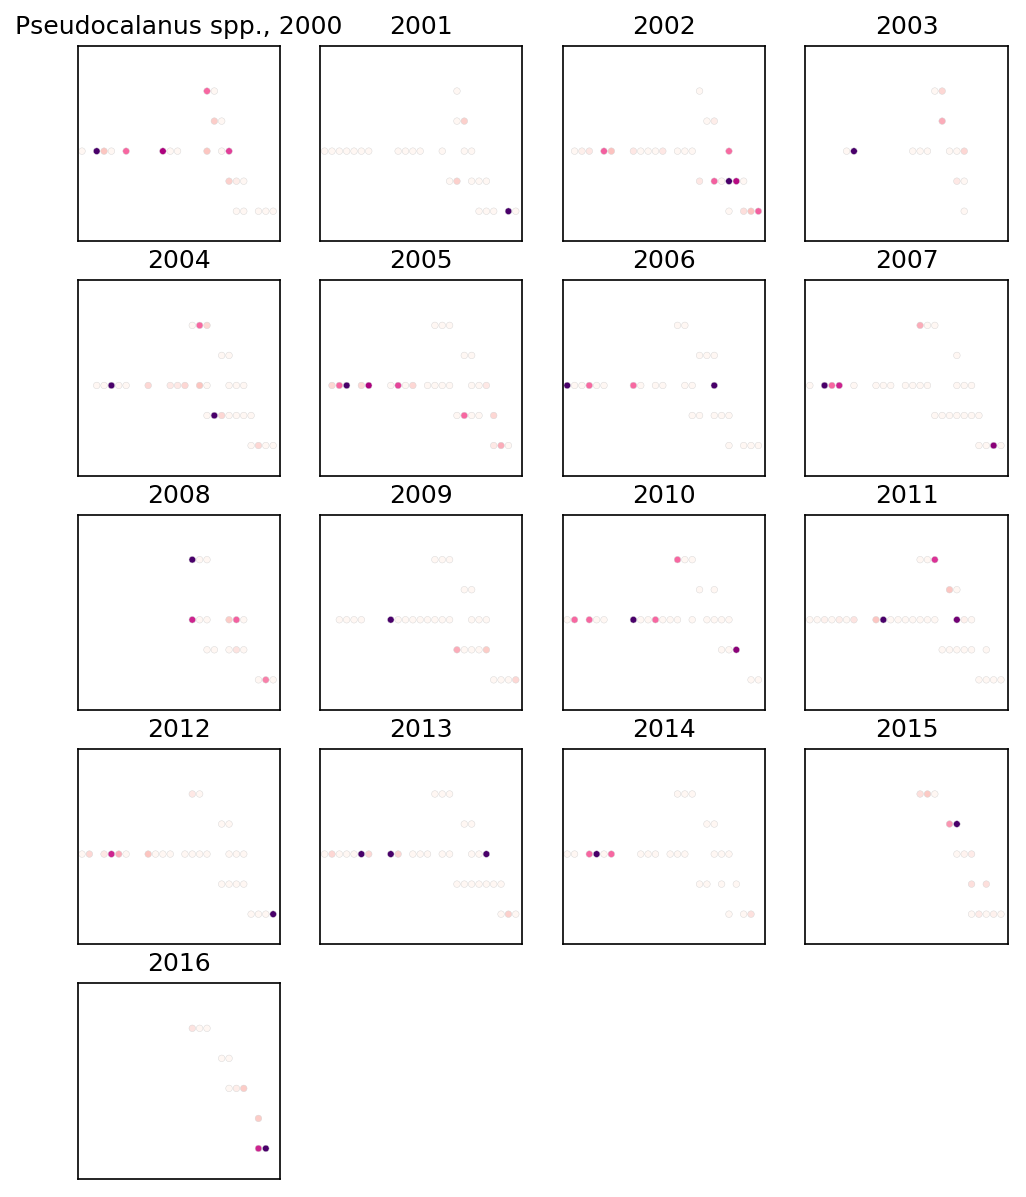

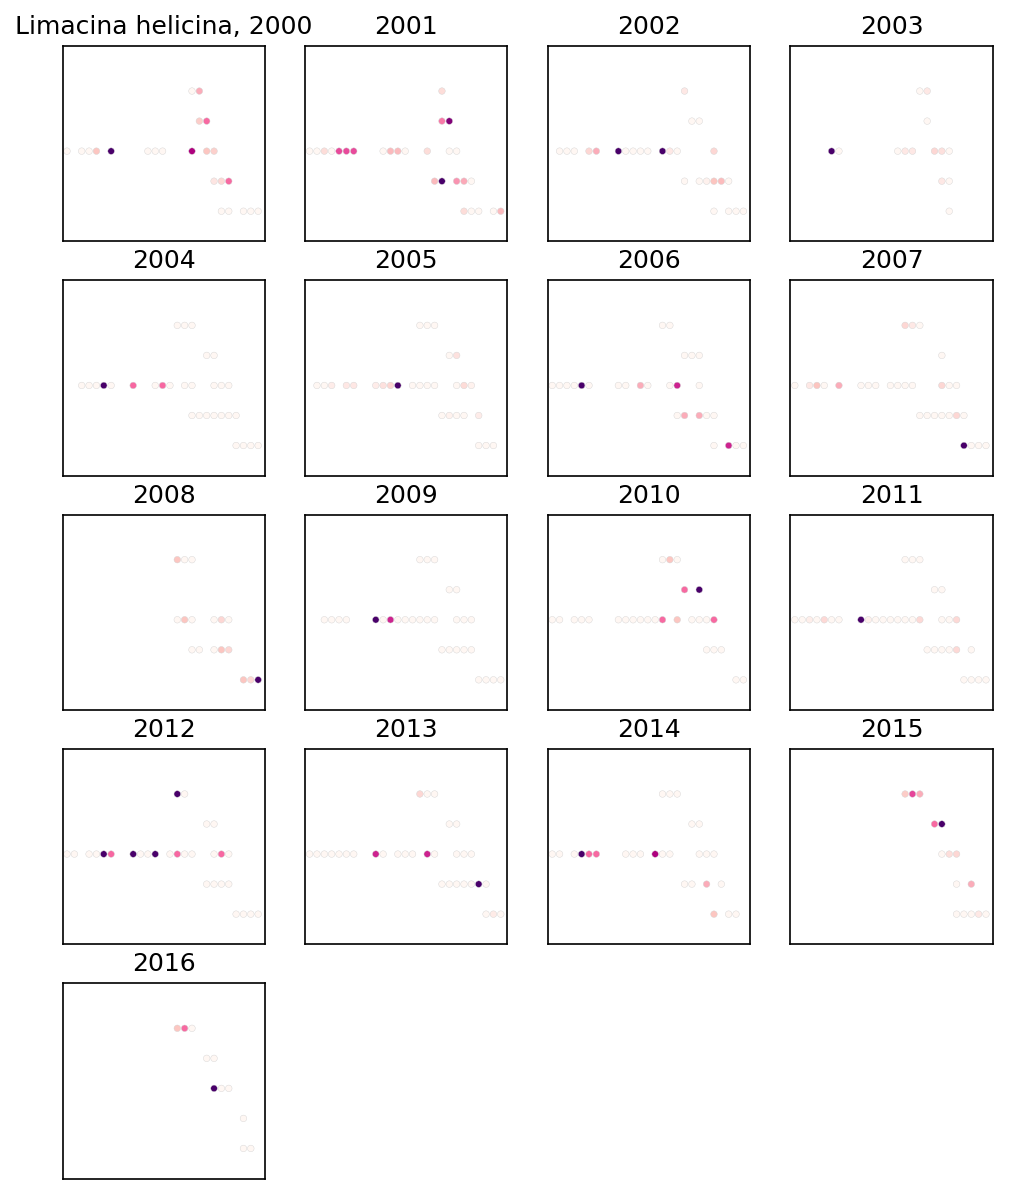

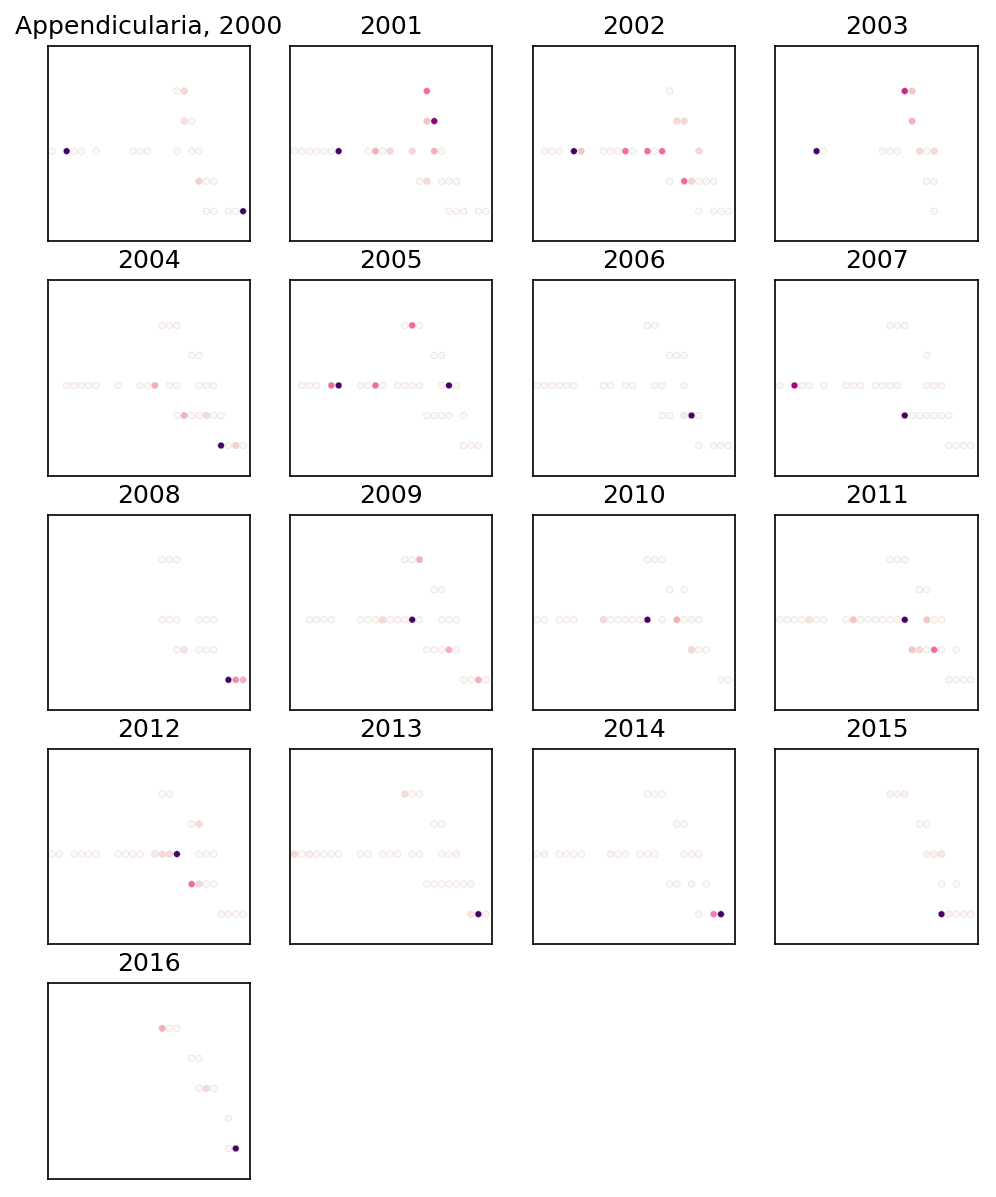

In [306]:
for i in range(18):
    fig = plt.figure(figsize=(8,10),dpi=150)
    for yi,y in enumerate(yrs):
        plt.subplot(5,4,yi+1)
        plt.scatter(coor['lon'],coor['lat'],c=bingrpyrs_n[:,i,yi],s=10,cmap='RdPu',edgecolor='lightgray',linewidth=0.2)
        if yi==0:
            plt.title(sgr[i]+', '+str(y))
        else:
            plt.title(str(y))
        plt.xlim((-180,-125))
        plt.ylim((48,61))
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
    plt.savefig('../figures/allpoints/groups_relabunperyear_normal_'+str(i)+'.png')
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


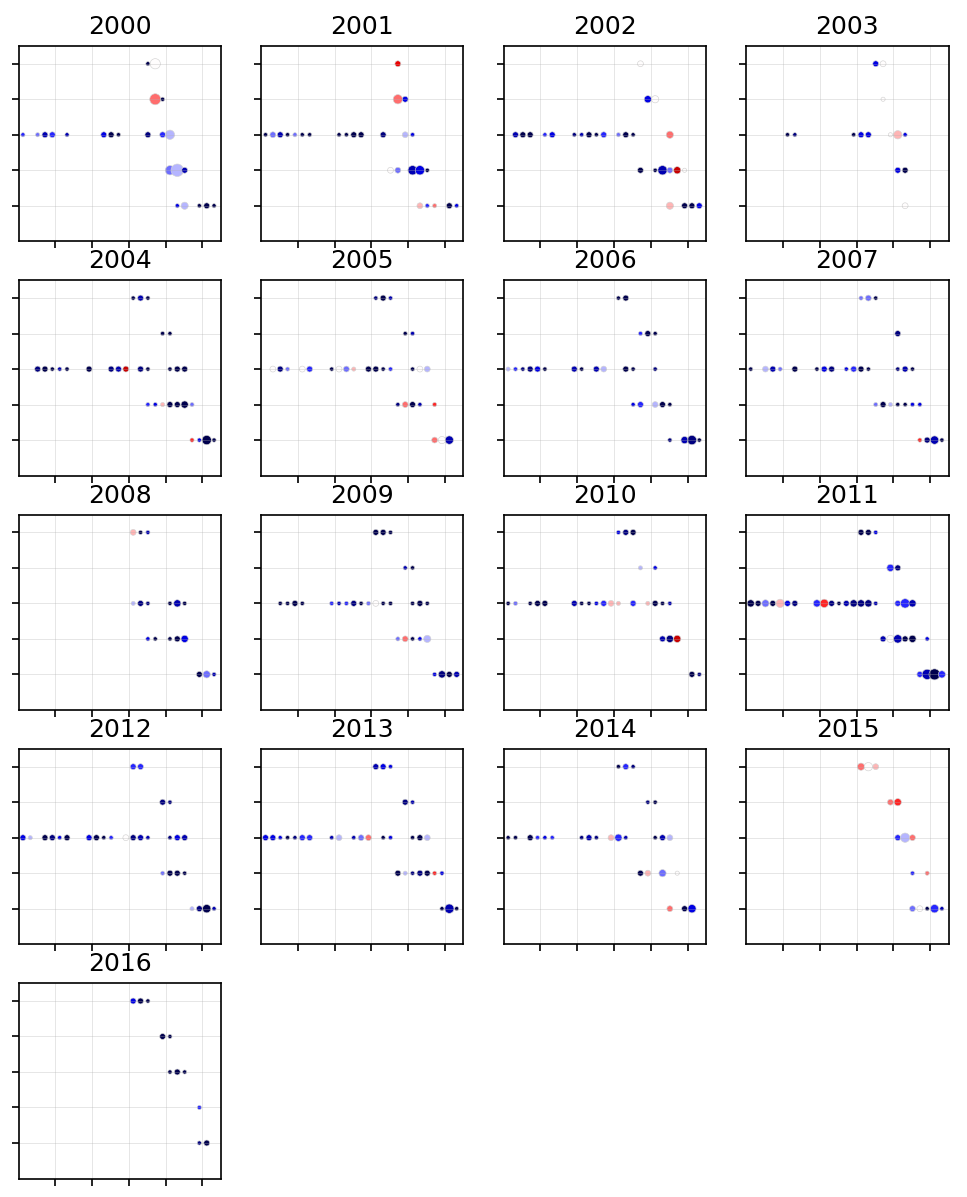

In [277]:
xx=np.where(bingrpyrs>0,bingrpyrs,np.nan)
xx=xx*0+1
binnumgrps=np.nansum(xx,axis=1)
xm=np.nanmedian(binnumgrps,axis=1)

fig = plt.figure(figsize=(8,10),dpi=150)
for yi,y in enumerate(yrs):
    plt.subplot(5,4,yi+1)
    plt.grid(True,linewidth=0.3, alpha=0.5)
    plt.scatter(coor['lon'],coor['lat'],c=binnumgrps[:,yi]-xm,s=binsamp[:,yi]*4,cmap='seismic', vmin=0, vmax=14, edgecolor='lightgray', linewidth=0.3)
    plt.title(str(y))
    plt.xlim((-180,-125))
    plt.ylim((48,59))
    plt.xticks([-170,-160,-150,-140,-130],[])
    plt.yticks([50,52,54,56,58],[])
plt.savefig('../figures/allpoints/numgroupsperyear.png')

In [346]:
tmpc=pd.read_csv('../data/bhoover/Clusters_2PC.csv')
tmpc['cluster_number']

0     4
1     1
2     3
3     2
4     2
5     5
6     1
7     3
8     3
9     4
10    1
11    4
12    6
13    5
14    3
15    3
16    4
17    4
18    4
19    4
20    6
21    7
22    6
23    1
24    3
25    2
26    1
27    1
28    1
29    3
30    1
31    2
32    2
33    2
34    1
35    2
36    4
37    2
38    2
39    2
40    1
Name: cluster_number, dtype: int64

In [386]:
# separate into warm and cold years --- summer (mid may . mid aug)
wy = [2004,2005,2014,2015,2016] # warm = 2015, 2016 have few data
cy = [2007,2008,2010,2011,2012] # cold years - 2008 has few data
#ny = [2000,2001,2002,2003,2006,2009,2013] # neutral years - 2013 has few data
# spring (march - may)
#wy = [2003,2005,2014,2015,2016] # warm = 2015, 2016 have few data
#cy = [2007,2008, 2009, 2012] # cold years - 2008 has few data
#ny = [2000,2001,2002,2003,2006,2009,2013] # neutral years - 2013 has few data
clun=1

In [404]:
bingrpyrs[np.isin(coor.index.values,tmpc.loc[tmpc['cluster_number']==clun].index.values),0,np.isin(yrs,wy)]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (10,) (5,) 

In [400]:
clb=tmpc.loc[tmpc['cluster_number']==clun].index.values
fig = plt.figure(figsize=(8,5),dpi=150)
for gr in range(len(sgr)):
    xw=bingrpyrs[np.isin(coor.index.values,tmpc.loc[tmpc['cluster_number']==clun].index.values),gr,np.isin(yrs,wy)]
    xwm=np.nanmean(xw)
    xwx=np.nanstd(xw)
    xc=bingrpyrs[np.isin(coor.index.values,tmpc.loc[tmpc['cluster_number']==clun].index.values),gr,np.isin(yrs,cy)]
    xcm=np.nanmean(cw)
    xcx=np.nanstd(cw)
    plt.bar(gr-0.2,xwm,alpha=0.5, color='gray',width=0.2)
    plt.errorbar(gr-0.2,xwm,yerr=xwx,ecolor='r')
    plt.bar(gr+0.2,xcm,alpha=0.5, color='gray',width=0.2)
    plt.errorbar(gr+0.2,xcm,yerr=xcx,ecolor='b')
    #print(np.nanmean(bingrpyrs[clb,gr,np.isin(yrs,wy)]),np.nanstd(bingrpyrs[clb,gr,np.isin(yrs,wy)]))
    #print(np.nanmean(bingrpyrs[clb,gr,np.isin(yrs,cy)]),np.nanstd(bingrpyrs[clb,gr,np.isin(yrs,cy)]))
    #print(np.nanmean(bingrpyrs[:,gr,np.isin(yrs,ny)]),np.nanstd(bingrpyrs[:,gr,np.isin(yrs,ny)]))
plt.xticks(np.arange(0,len(sgr)+1),sgr,rotation=90)
plt.xlim([-1, len(sgr)])
plt.grid(True)
plt.show()

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (10,) (5,) 

<Figure size 1200x750 with 0 Axes>

In [338]:
sgr

['Hyperiidea',
 'Chaetognatha',
 'Siphonophora',
 'Salpidae',
 'Calanus marshallae',
 'Calanus pacificus',
 'Eucalanus bungii',
 'Neocalanus cristatus',
 'Clione spp.',
 'Oithona spp.',
 'Metridia pacifica',
 'Acartia longiremis',
 'Euphausiacea',
 'Centropages abdominalis',
 'Neocalanus plumchrus',
 'Pseudocalanus spp.',
 'Limacina helicina',
 'Appendicularia']

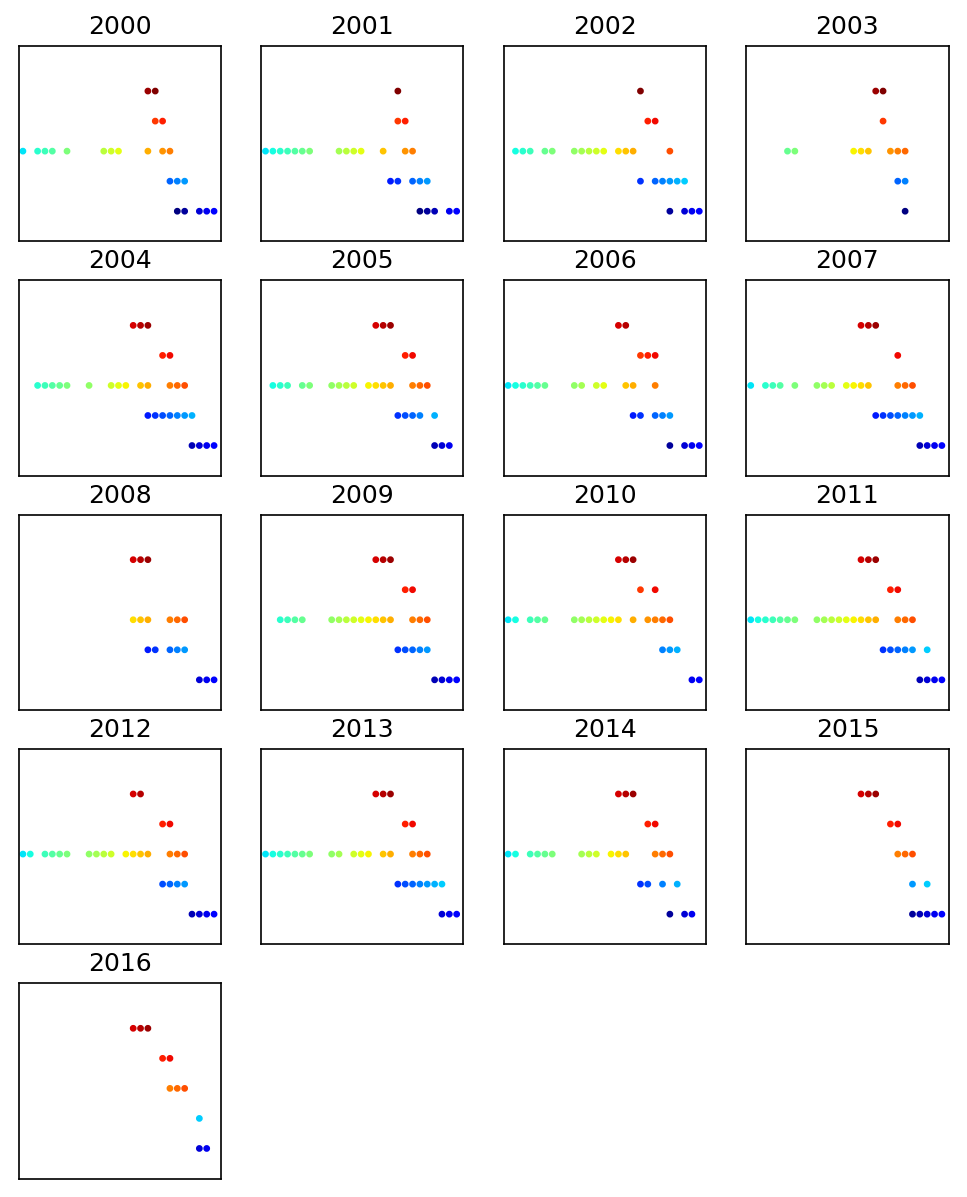

In [214]:
fig = plt.figure(figsize=(8,10),dpi=150)
for yi,y in enumerate(yrs):
    plt.subplot(5,4,yi+1)
    plt.scatter(coor['lon'],coor['lat'],c=coor.index.values,s=binyrs[:,yi],cmap='jet',vmin=0,vmax=40)
    plt.title(str(y))
    plt.xlim((-180,-125))
    plt.ylim((48,61))
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
plt.savefig('../figures/allpoints/groups_dataperyear.png')

In [236]:
xx=np.where(bingrpyrs>0,bingrpyrs,np.nan)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [397]:
coor.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [307]:
dt

,lat,lon,numofsamples,depth,Nannocalanus minor,Rhincalanus nasutus,Euchirella rostrata,Tomopteris,Hyperiidea,Chaetognatha,...,Tortanus discaudatus,Acartia longiremis,Euphausiacea,Acartia tonsa,Acartia tumida,Centropages abdominalis,Neocalanus plumchrus,Pseudocalanus spp.,Limacina helicina,Appendicularia
0,50.0,-136.8,5.0,-3750.006422,0.0000,0.0,0.000000,0.000000,22.400000,10.200000,...,0.000000,0.000000,5.600000,0.0,0.000000,0.000000,82.200000,0.000000,10.000000,0.000000
1,50.0,-134.8,11.0,-3346.489541,0.0000,0.0,0.000000,0.000000,7.545455,0.909091,...,0.000000,0.000000,4.636364,0.0,0.000000,0.000000,45.363636,0.000000,4.545455,318.181818
2,50.0,-132.8,12.0,-3029.919795,0.0000,0.0,0.083333,0.000000,3.500000,17.666667,...,0.000000,12.500000,6.666667,0.0,0.000000,0.000000,59.500000,8.333333,25.000000,20.833333
3,50.0,-130.8,26.0,-2326.616014,0.0000,0.0,0.000000,0.038462,2.769231,2.307692,...,0.000000,28.846154,12.653846,0.0,0.000000,1.923077,47.576923,19.230769,5.769231,76.923077
4,50.0,-128.8,55.0,-1923.021410,0.0000,0.0,0.000000,0.018182,2.381818,1.181818,...,0.000000,70.000000,13.018182,0.0,0.000000,20.909091,27.109091,47.272727,3.636364,292.727273
5,50.0,-126.8,23.0,-952.415238,0.0000,0.0,0.000000,0.000000,1.304348,5.130435,...,0.000000,71.739130,16.478261,0.0,0.000000,45.652174,5.130435,50.000000,6.521739,17.391304
6,52.0,-144.8,5.0,-3968.108963,0.0000,0.0,0.000000,0.000000,0.200000,2.600000,...,0.000000,0.000000,1.200000,0.0,0.000000,0.000000,23.200000,0.000000,20.000000,60.000000
7,52.0,-142.8,19.0,-3854.861529,0.0000,0.0,0.000000,0.000000,2.631579,13.210526,...,0.000000,2.631579,4.736842,0.0,0.000000,0.000000,95.052632,26.315789,21.052632,13.157895
8,52.0,-140.8,13.0,-3708.756325,0.0000,0.0,0.000000,0.000000,2.384615,25.153846,...,0.000000,0.000000,5.384615,0.0,0.000000,0.000000,66.153846,26.923077,3.846154,15.384615
9,52.0,-138.8,24.0,-3606.517813,0.0000,0.0,0.000000,0.291667,1.250000,12.083333,...,0.000000,4.166667,11.458333,0.0,0.000000,0.000000,94.083333,18.750000,20.833333,8.333333


In [335]:
sgr

['Hyperiidea',
 'Chaetognatha',
 'Siphonophora',
 'Salpidae',
 'Calanus marshallae',
 'Calanus pacificus',
 'Eucalanus bungii',
 'Neocalanus cristatus',
 'Clione spp.',
 'Oithona spp.',
 'Metridia pacifica',
 'Acartia longiremis',
 'Euphausiacea',
 'Centropages abdominalis',
 'Neocalanus plumchrus',
 'Pseudocalanus spp.',
 'Limacina helicina',
 'Appendicularia']